In [12]:
!pip install uv
!uv pip install --prerelease allow --system git+https://github.com/kzqiu/flock.git#egg=flock-rl

Using Python 3.11.12 environment at: /usr
Resolved 62 packages in 577ms
Audited 62 packages in 0.32ms


In [13]:
import numpy as np
from flock import FlockEnv
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise
from tqdm import tqdm

In [14]:
env = FlockEnv(num_agents=50, num_obstacles=15)

# reset the environment to get initial observation
observation = env.reset()

done = False
total_reward = 0

while not done:
    # sample random actions for all agents
    actions = np.random.uniform(-1, 1, size=(env.num_agents, 2))

    observation, reward, done, info = env.step(actions)

    total_reward += reward

    # check if user requested exit
    if hasattr(env, "user_exit") and env.user_exit:
        print("User requested exit. Stopping simulation.")
        break

    print(
        f"Step: {env.current_step}, Reward: {reward:.2f}, "
        f"Distance: {info['distance_to_target']:.2f}"
    )

print(f"Episode done. Total reward: {total_reward:.2f}")
print(f"Success: {info['success']}")

env.close()

Step: 1, Reward: -0.01, Distance: 360.58
Step: 2, Reward: -0.01, Distance: 360.58
Step: 3, Reward: -0.01, Distance: 360.58
Step: 4, Reward: -0.01, Distance: 360.58
Step: 5, Reward: -0.01, Distance: 360.58
Step: 6, Reward: -0.01, Distance: 360.58
Step: 7, Reward: -0.01, Distance: 360.58
Step: 8, Reward: -0.01, Distance: 360.58
Step: 9, Reward: -0.01, Distance: 360.58
Step: 10, Reward: -0.01, Distance: 360.58
Step: 11, Reward: -0.01, Distance: 360.58
Step: 12, Reward: -0.01, Distance: 360.58
Step: 13, Reward: -0.01, Distance: 360.58
Step: 14, Reward: -0.01, Distance: 360.58
Step: 15, Reward: -0.01, Distance: 360.58
Step: 16, Reward: -0.01, Distance: 360.58
Step: 17, Reward: -0.01, Distance: 360.58
Step: 18, Reward: -0.01, Distance: 360.58
Step: 19, Reward: -0.01, Distance: 360.58
Step: 20, Reward: -0.01, Distance: 360.58
Step: 21, Reward: -0.01, Distance: 360.58
Step: 22, Reward: -0.01, Distance: 360.58
Step: 23, Reward: -0.01, Distance: 360.58
Step: 24, Reward: -0.01, Distance: 360.58
S

In [16]:
def train_td3():
    env = FlockEnv(
        num_agents=3,
        num_obstacles=0,
        width=400,
        height=300
    )

    # define the action noise for exploration
    n_actions = env.action_space.shape[-1]
    action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

    model = TD3(
        "MlpPolicy",
        env,
        action_noise=action_noise,
        learning_rate=1e-3,
        buffer_size=int(1e6),
        batch_size=100,
        gamma=0.99,
        train_freq=(1, "episode"),
        gradient_steps=-1,
        policy_delay=2,
        verbose=1,
    )

    # model = TD3.load("./logs/td3_flock_final")
    # model.set_env(env)

    total_timesteps = 100000
    save_interval = 50000

    with tqdm(total=total_timesteps) as pbar:
        for i in range(0, total_timesteps, save_interval):
            timesteps_to_train = min(save_interval, total_timesteps - i)
            model.learn(total_timesteps=timesteps_to_train, reset_num_timesteps=False)
            model.save(f"./logs/td3_flock_{i + timesteps_to_train}")
            pbar.update(timesteps_to_train)

    model.save("./logs/td3_flock_final")

def evaluate():
    env = FlockEnv(
        num_agents=3,
        num_obstacles=0,
        width=400,
        height=300
    )

    model = TD3.load("./logs/td3_flock_final")

    obs = env.reset()
    done = False

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        env.render_for_colab()

    env.close()

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  0%|          | 0/100000 [00:00<?, ?it/s]

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 151      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 65       |
|    time_elapsed    | 30       |
|    total_timesteps | 2000     |
| train/             |          |
|    actor_loss      | -2.41    |
|    critic_loss     | 0.0295   |
|    learning_rate   | 0.001    |
|    n_updates       | 1500     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 103      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 53       |
|    time_elapsed    | 74       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -3.74    |
|    critic_loss     | 0.175    |
|    learning_rate   | 0.001    |
|    n_updates       | 3500     |
--------------

 50%|█████     | 50000/100000 [19:02<18:47, 44.33it/s]

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 120      |
| time/              |          |
|    episodes        | 104      |
|    fps             | 53       |
|    time_elapsed    | 37       |
|    total_timesteps | 52000    |
| train/             |          |
|    actor_loss      | -82.9    |
|    critic_loss     | 39.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 51500    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | 120      |
| time/              |          |
|    episodes        | 108      |
|    fps             | 45       |
|    time_elapsed    | 87       |
|    total_timesteps | 54000    |
| train/             |          |
|    actor_loss      | -92      |
|    critic_loss     | 53       |
|    learning_rate   | 0.001    |
|    n_updates       | 53500    |
--------------

100%|██████████| 100000/100000 [41:23<00:00, 40.26it/s]
/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



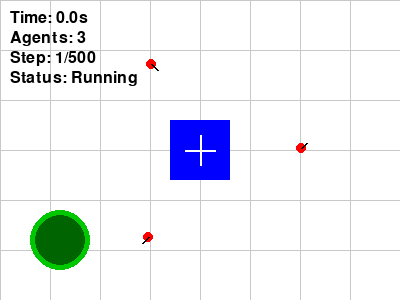

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



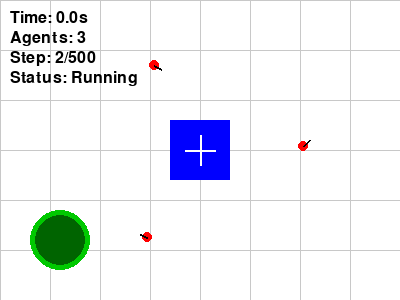


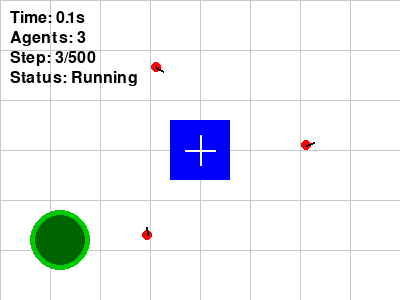


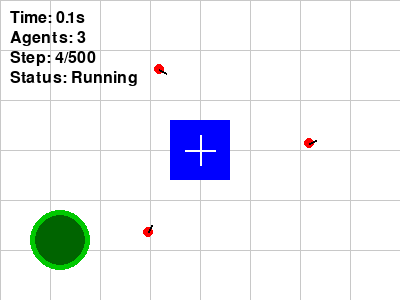


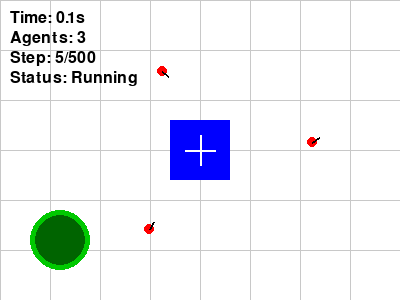


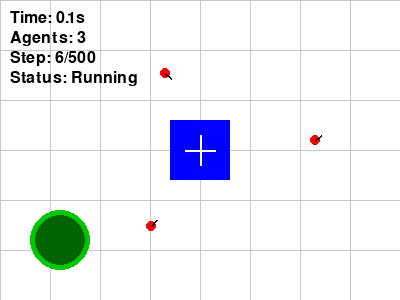


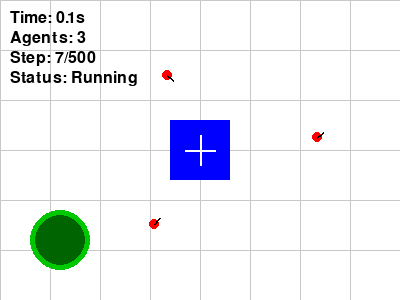


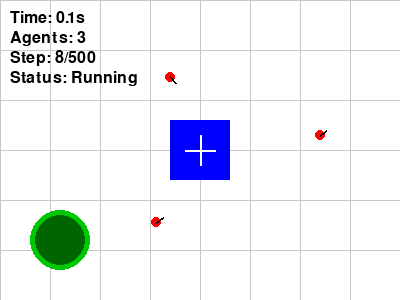


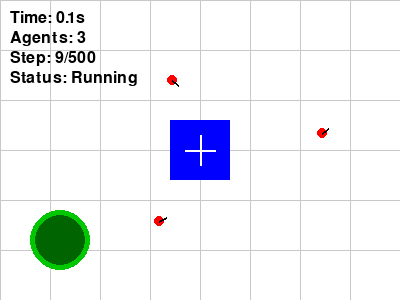


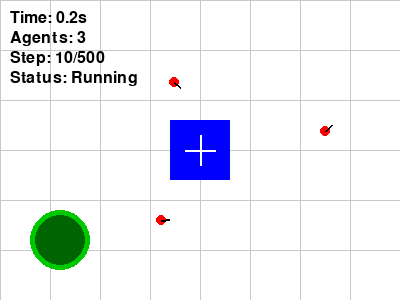


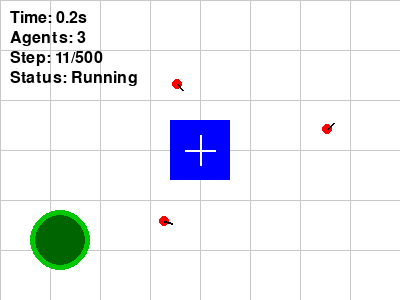


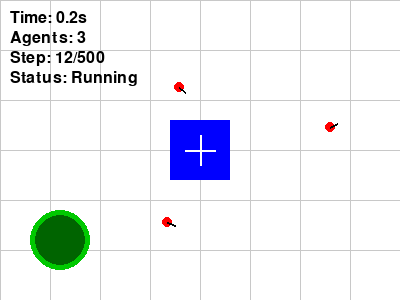


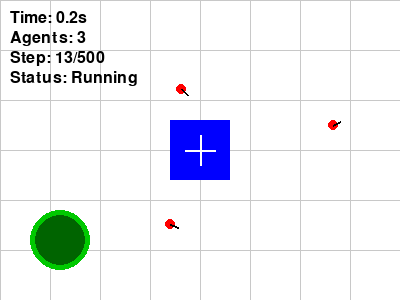


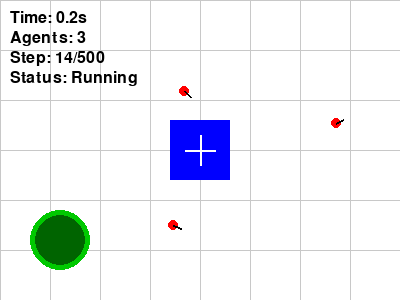


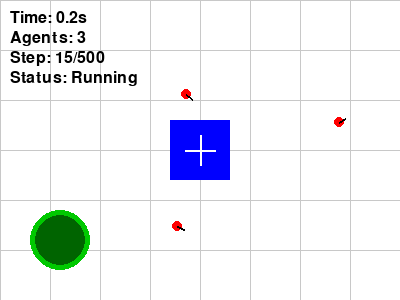


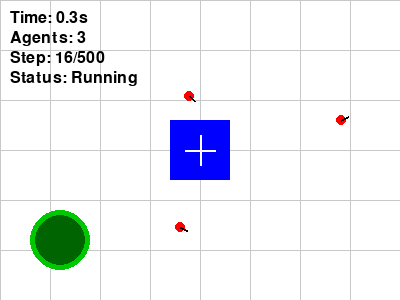


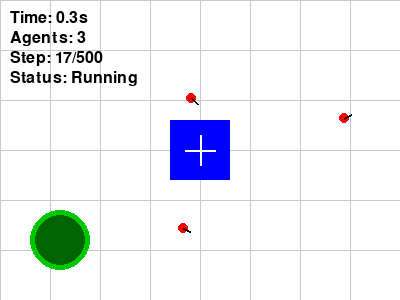


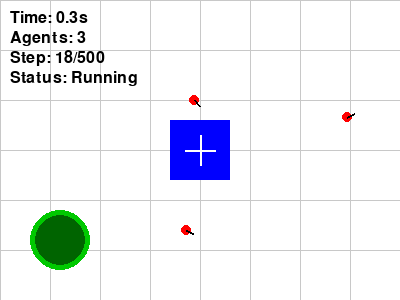


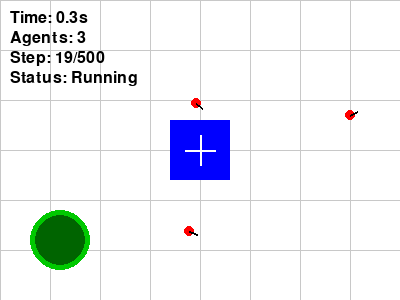


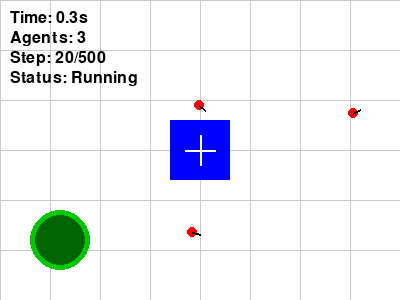


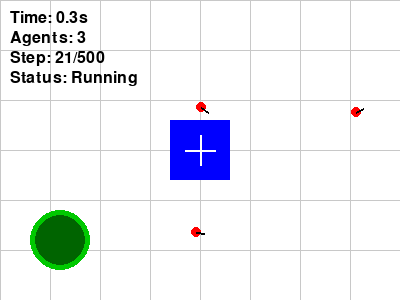


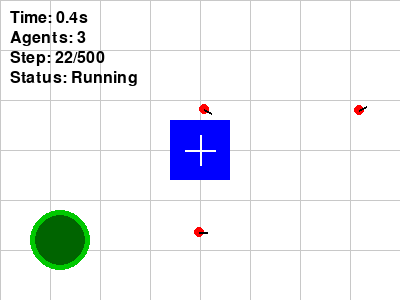


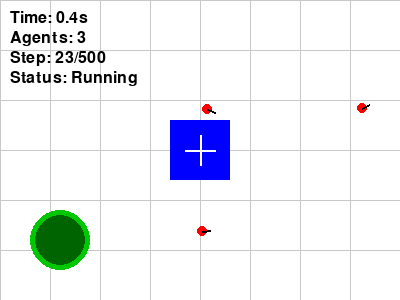


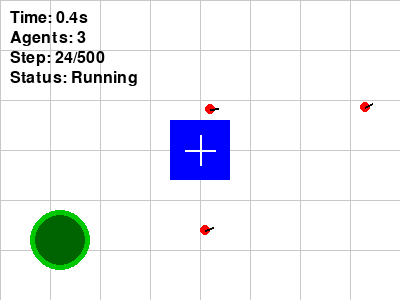


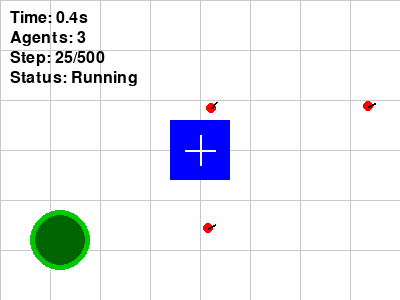


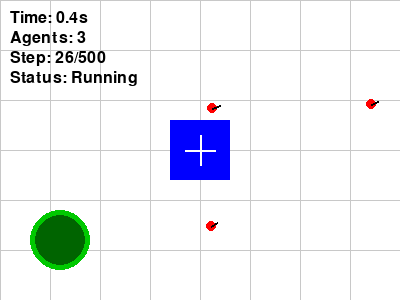


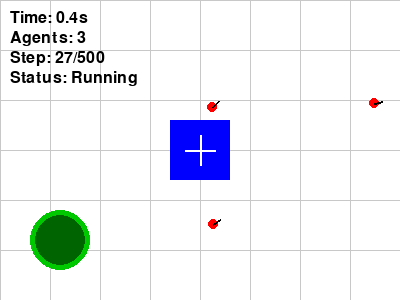


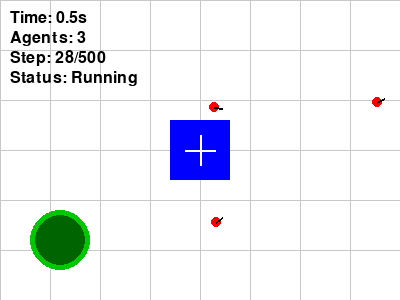


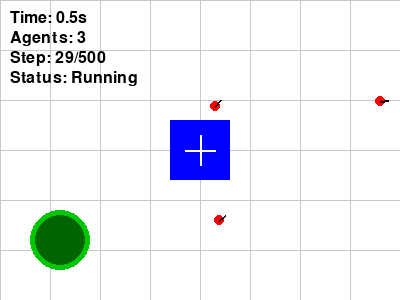


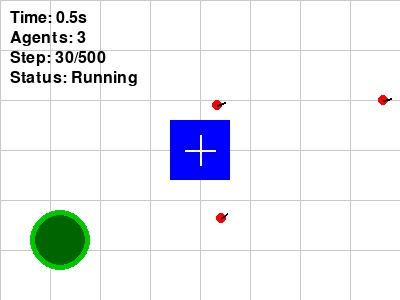


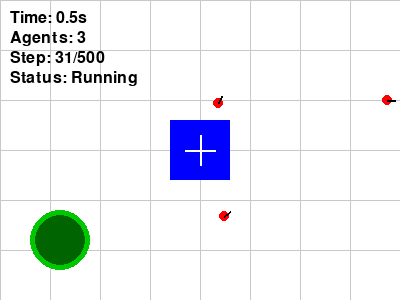


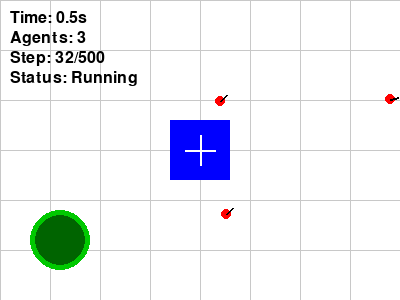


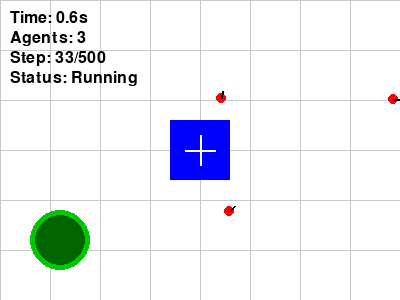


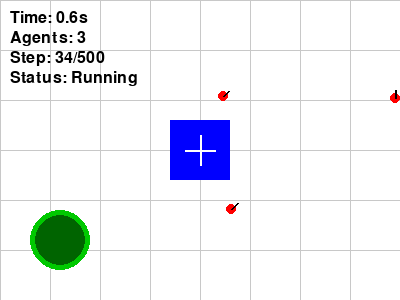


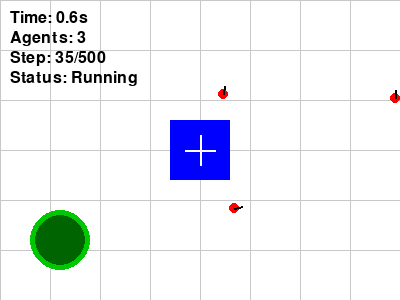


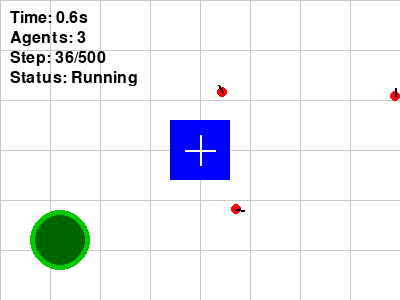


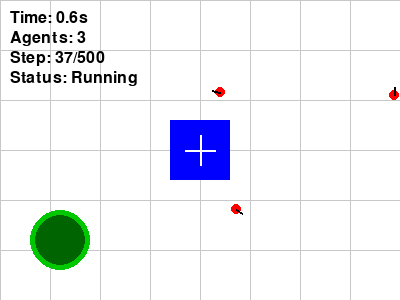


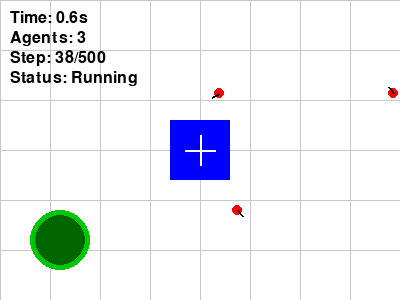


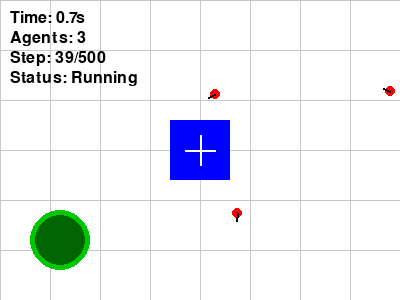


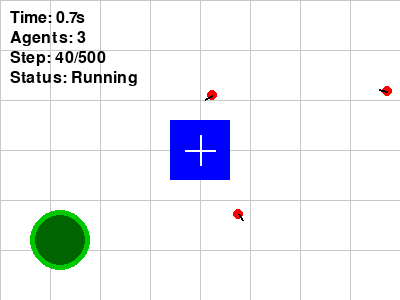


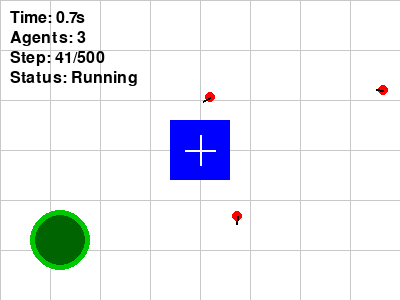


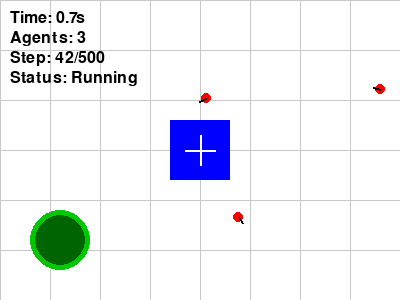


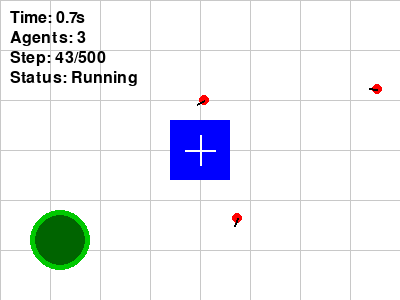


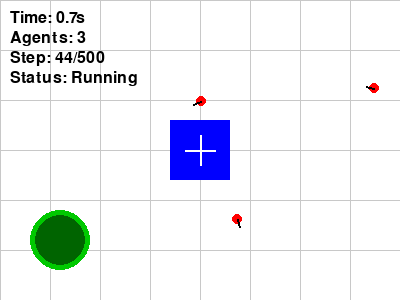


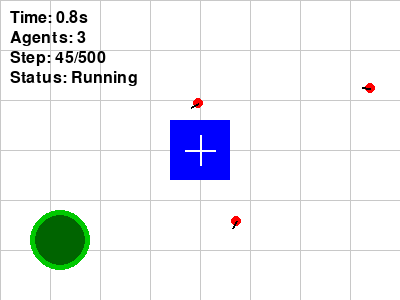


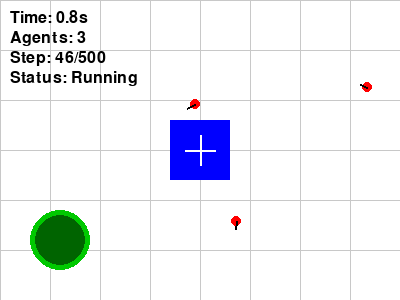


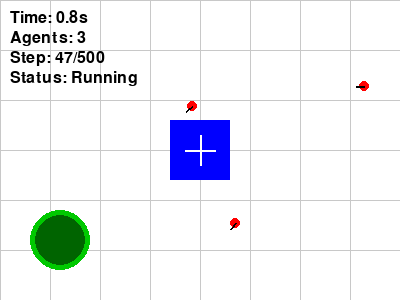


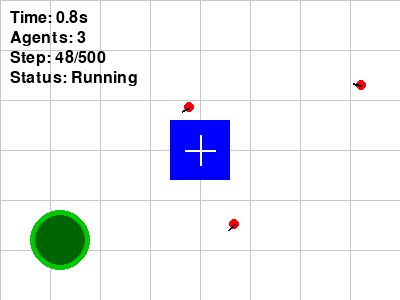


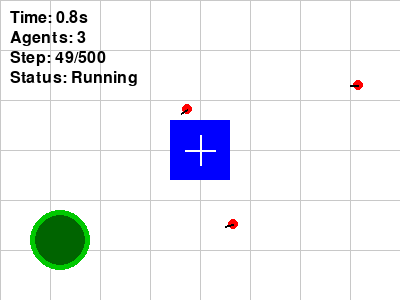


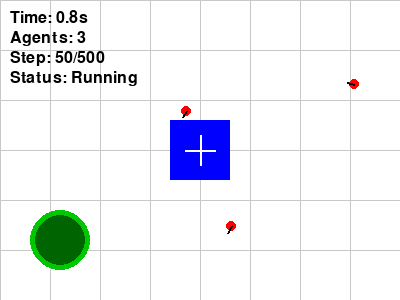


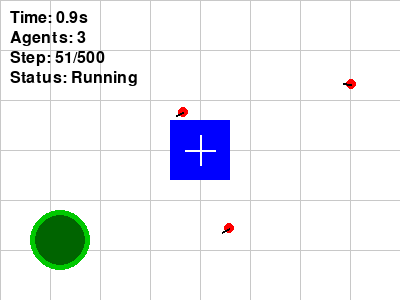


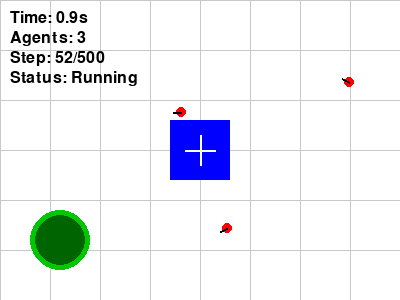


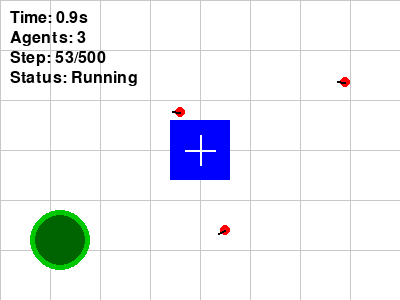


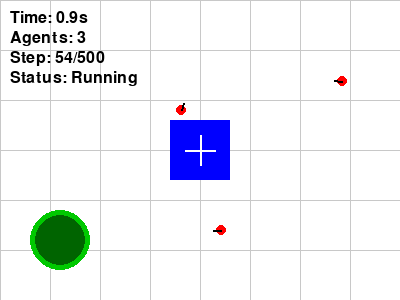


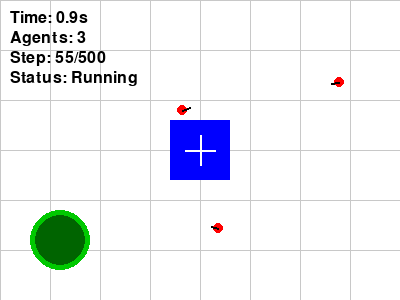


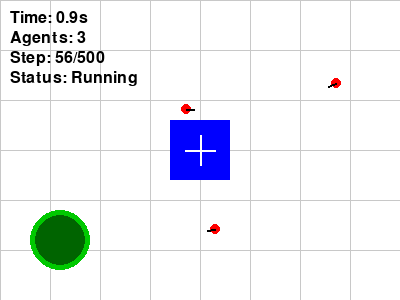


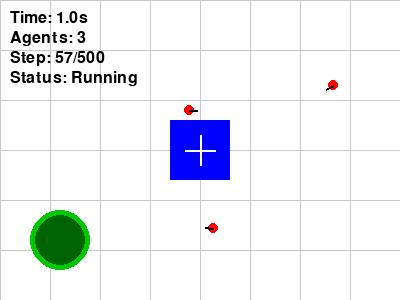


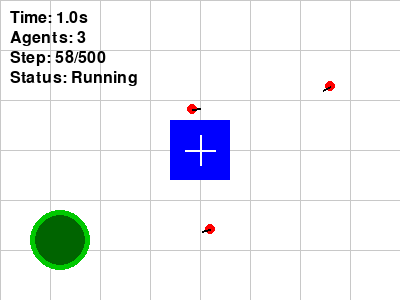


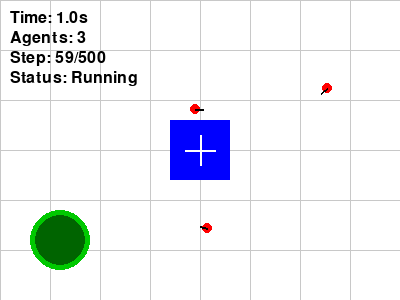


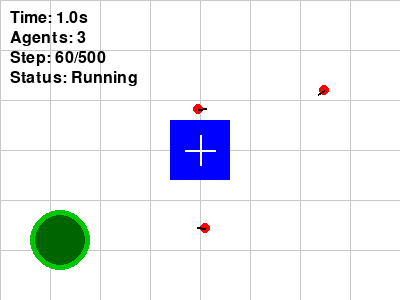


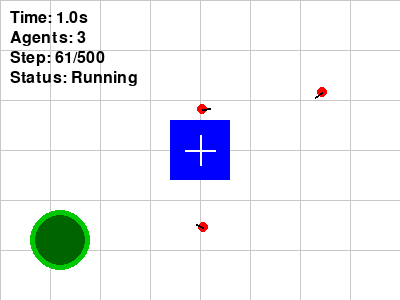


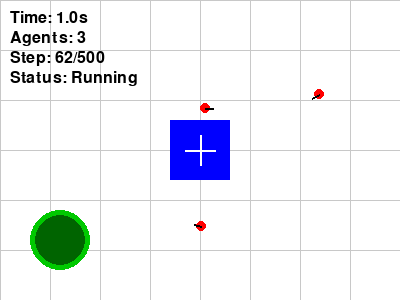


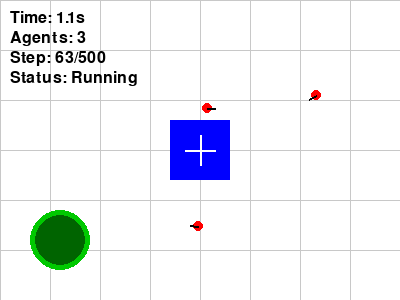


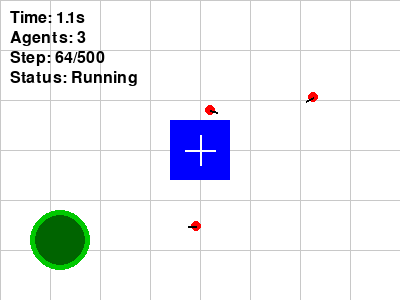


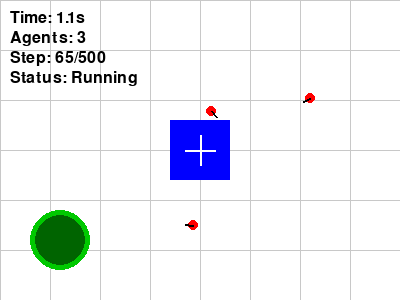


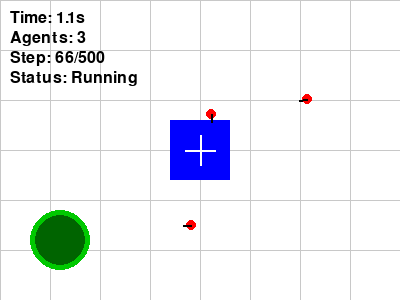


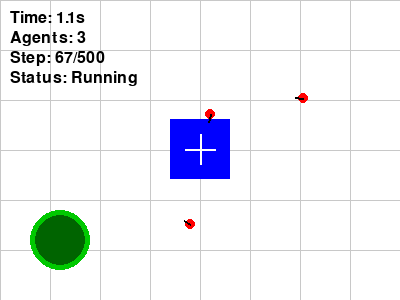


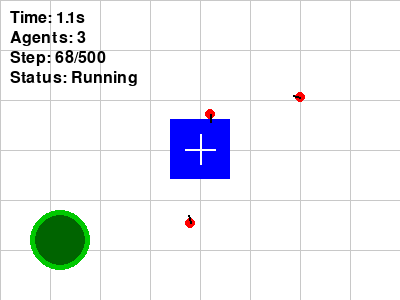


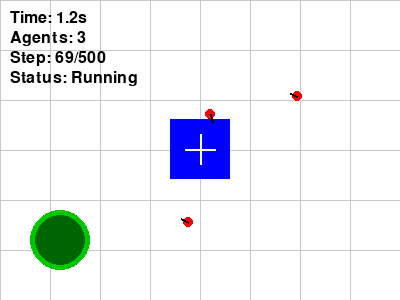


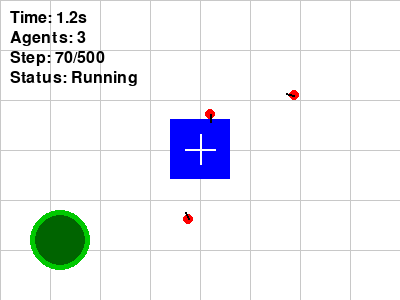


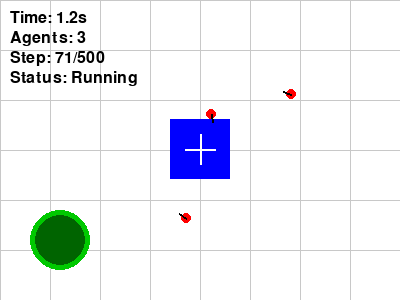


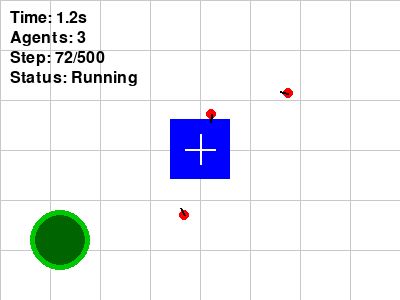


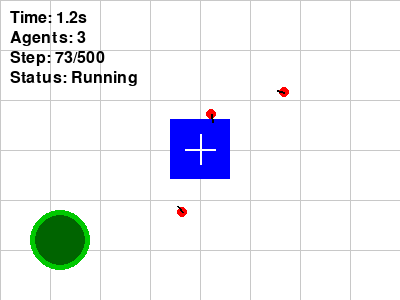


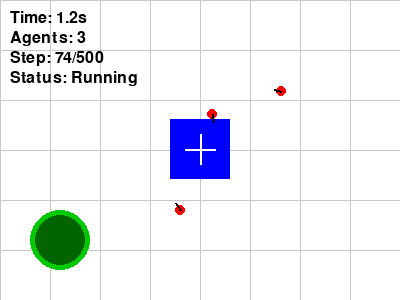


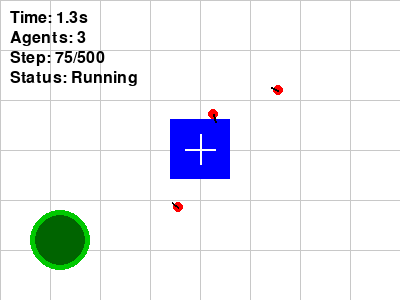


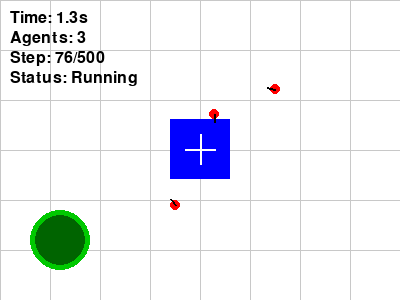


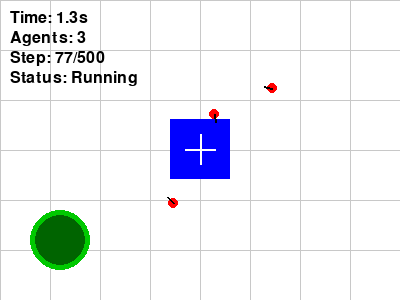


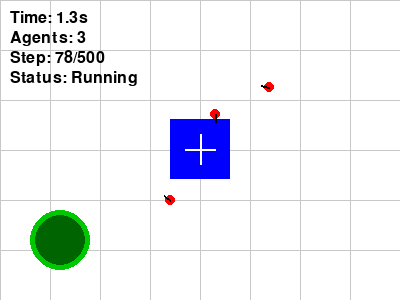


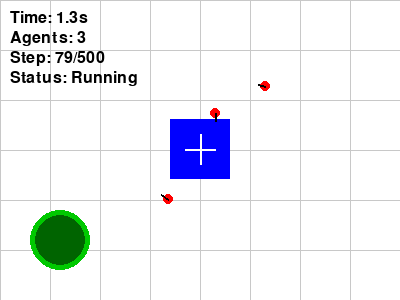


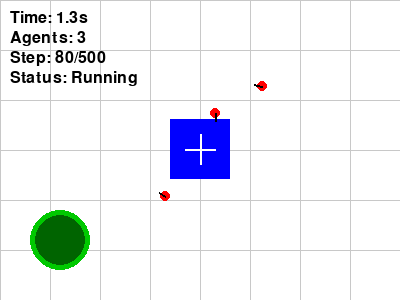


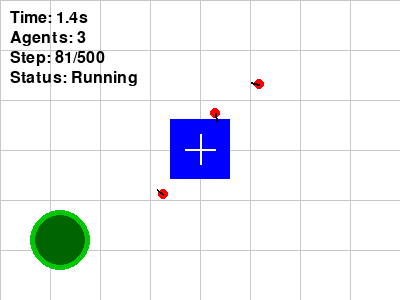


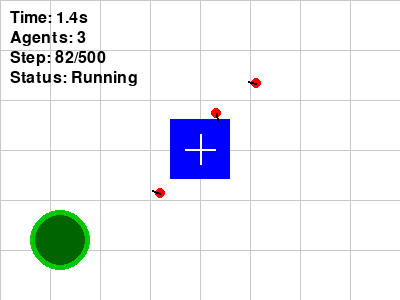


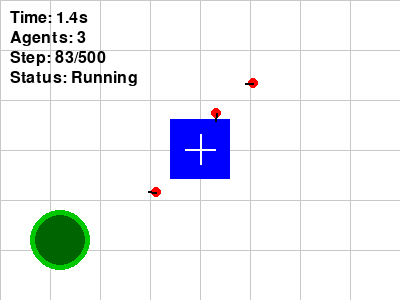


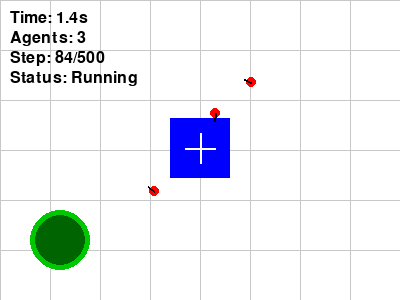


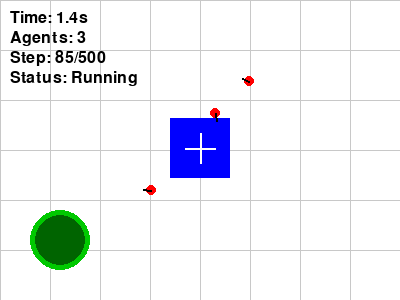


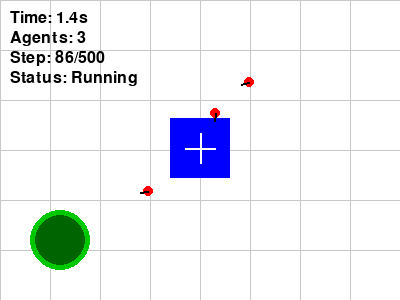


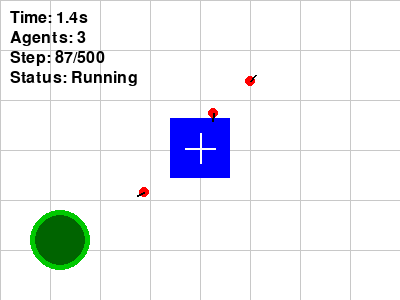


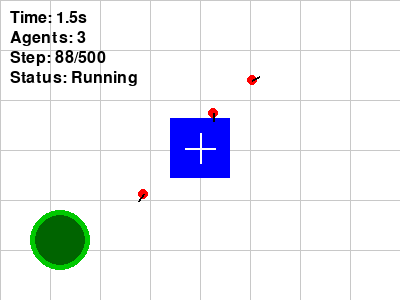


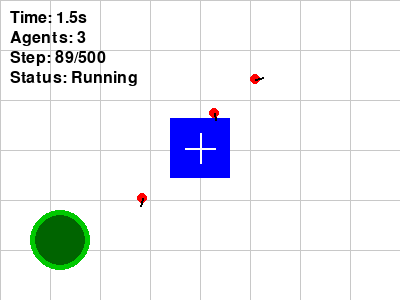


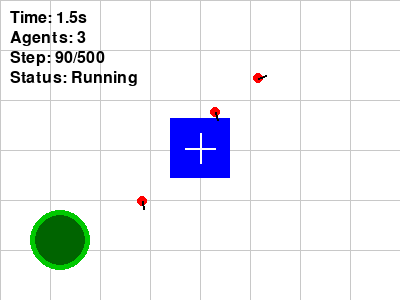


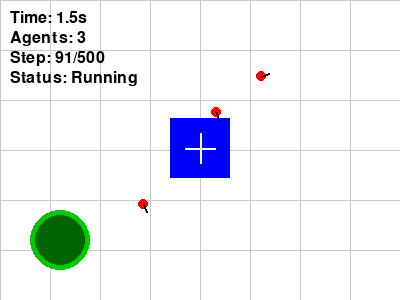


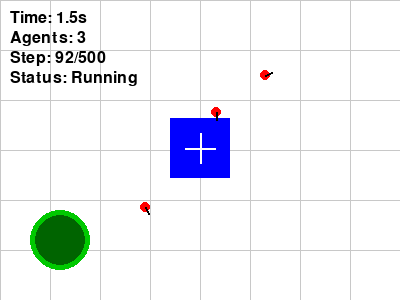


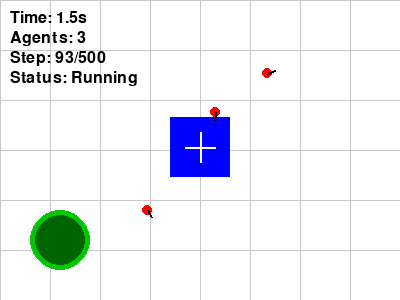


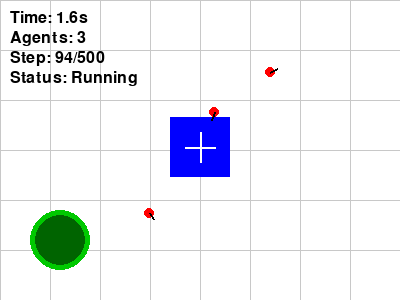


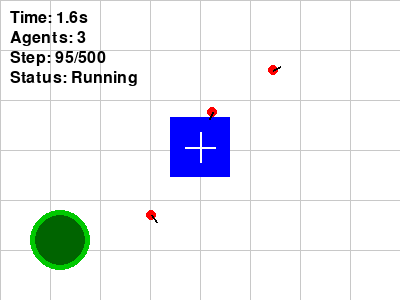


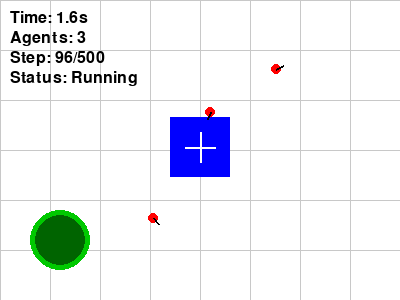


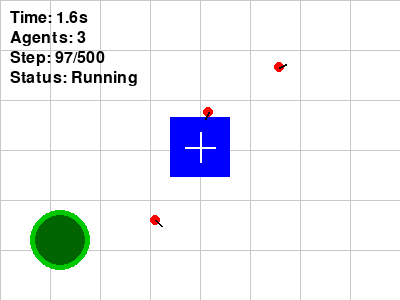


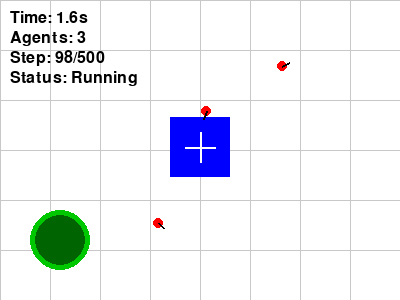


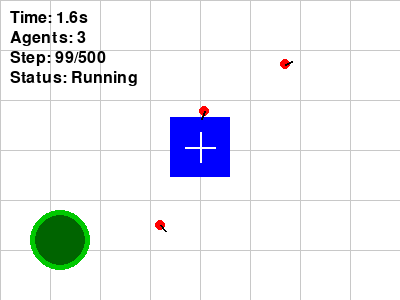


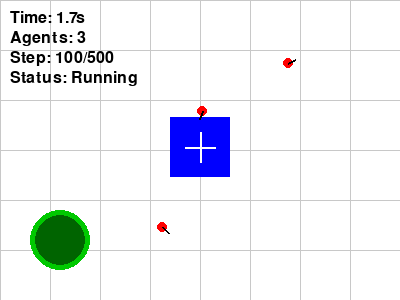


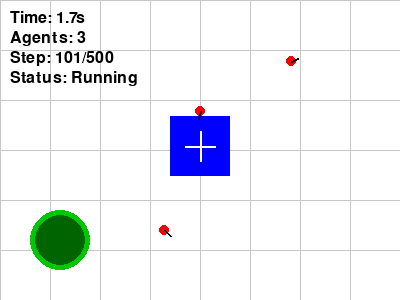


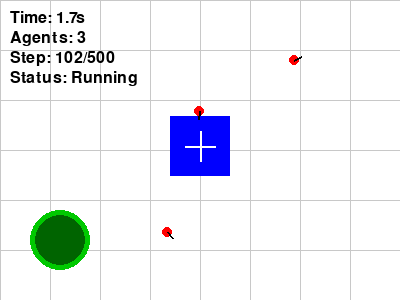


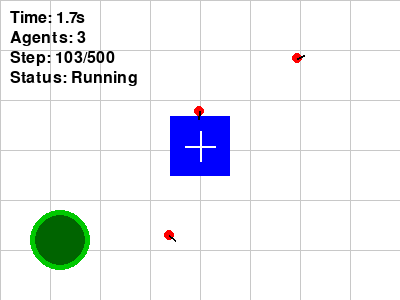


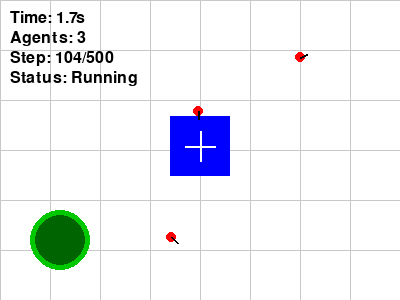


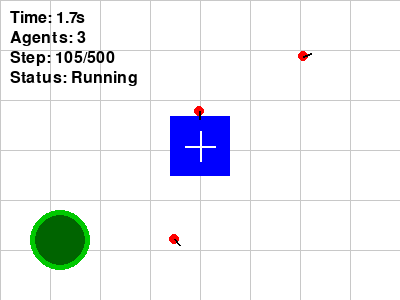


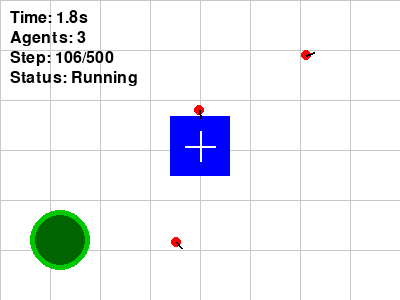


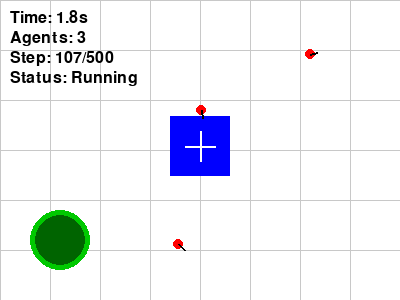


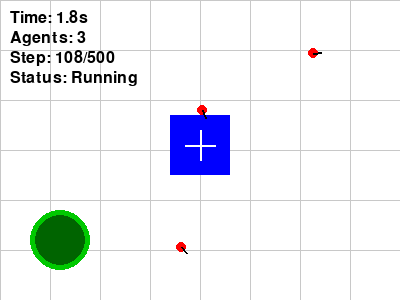


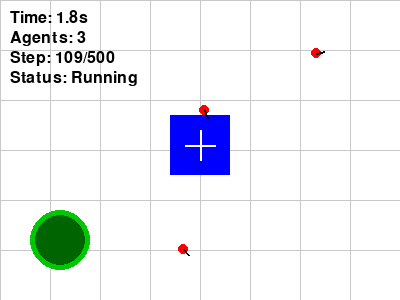


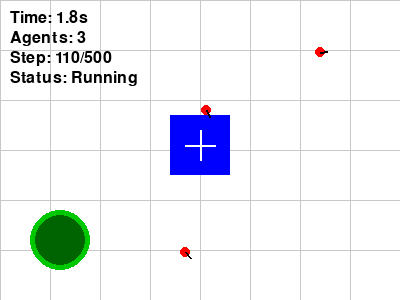


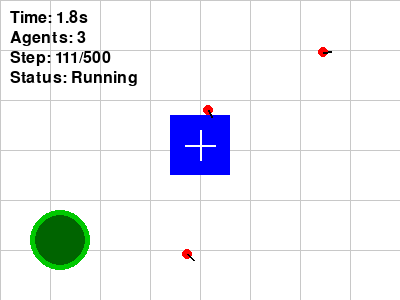


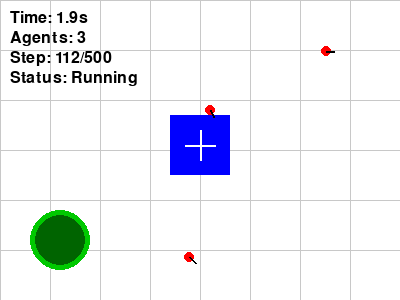


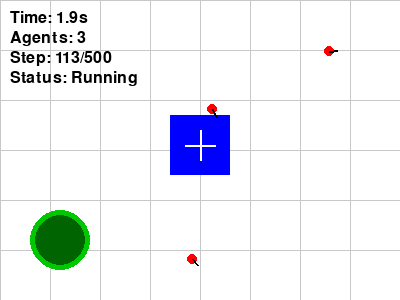


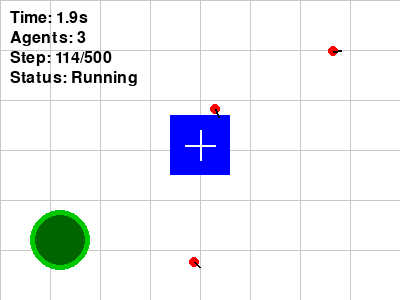


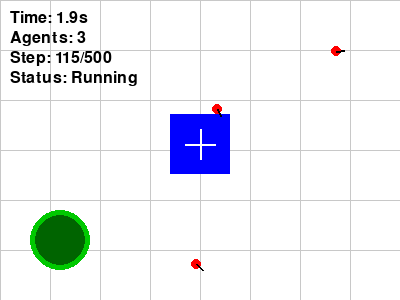


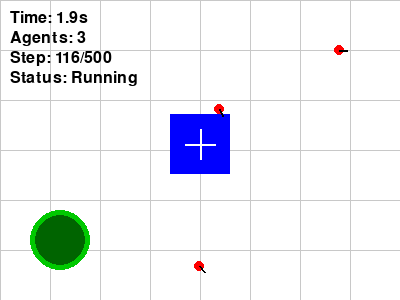


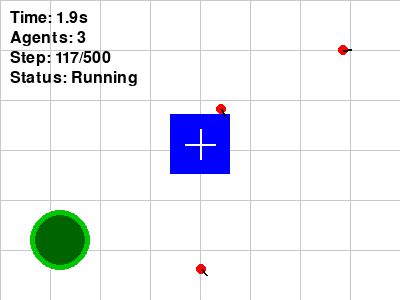


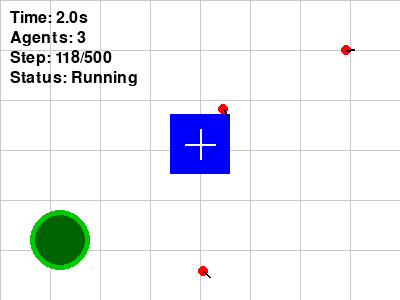


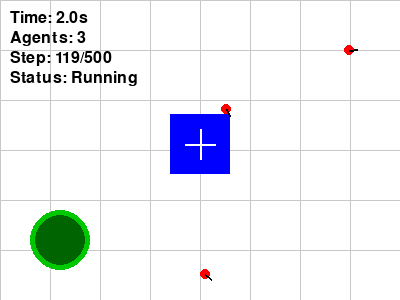


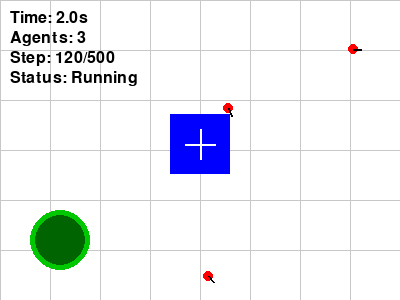


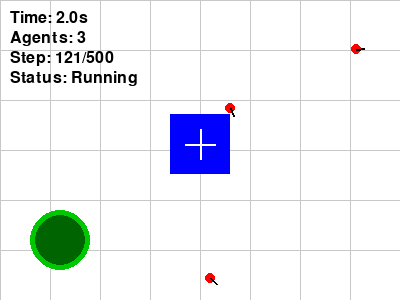


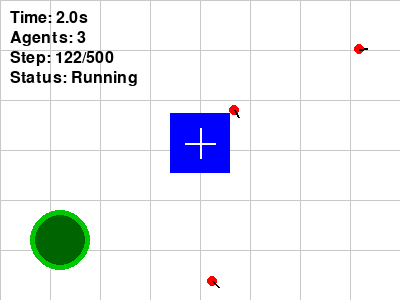


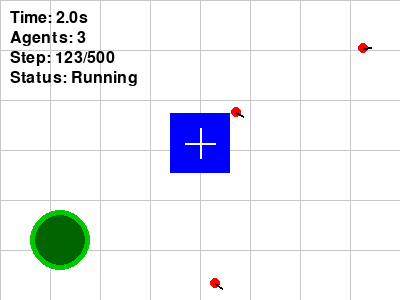


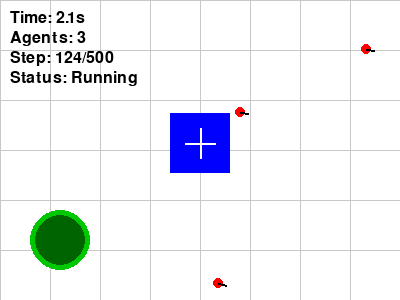


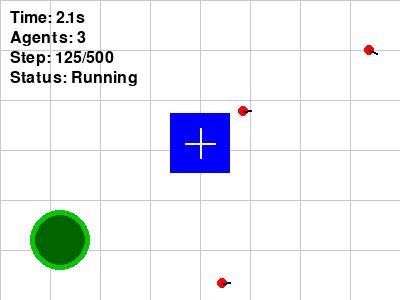


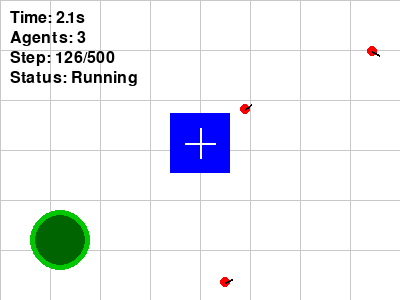


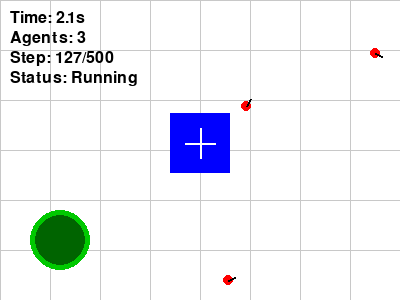


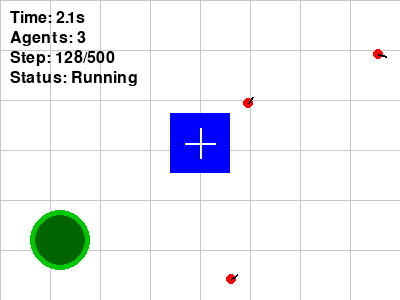


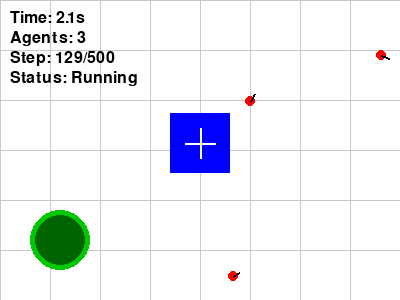


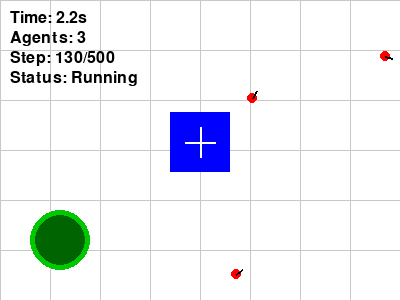


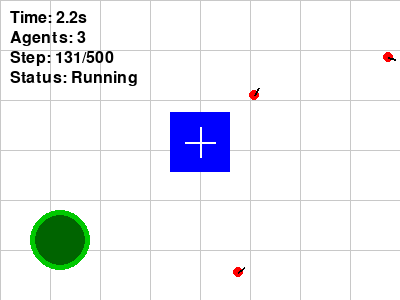


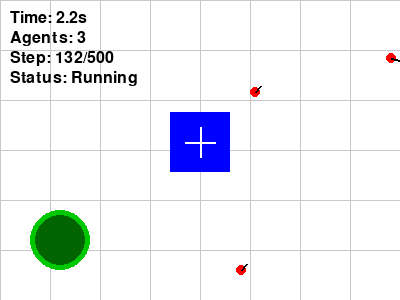


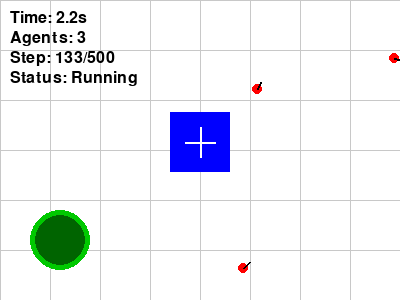


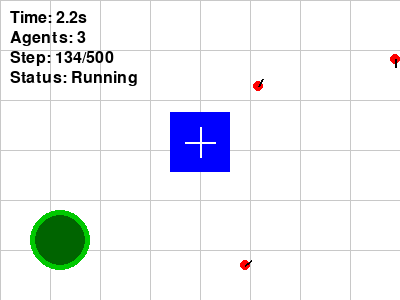


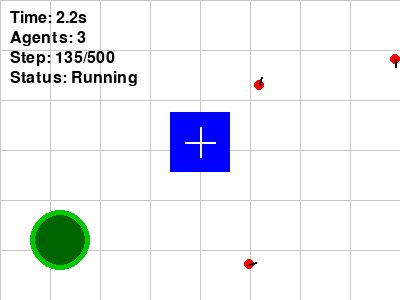


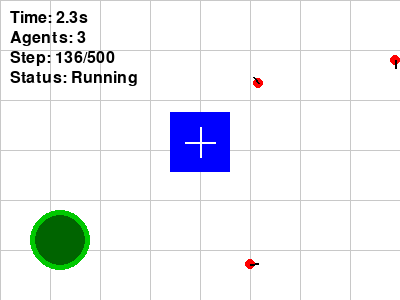


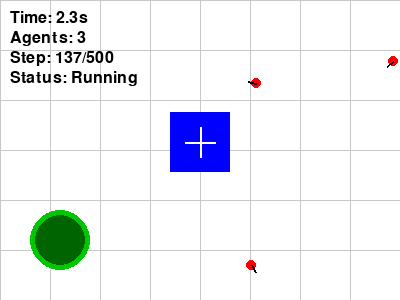


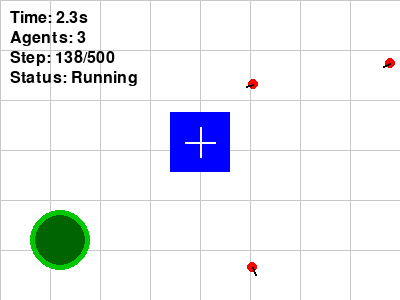


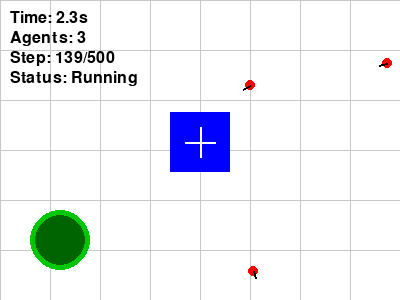


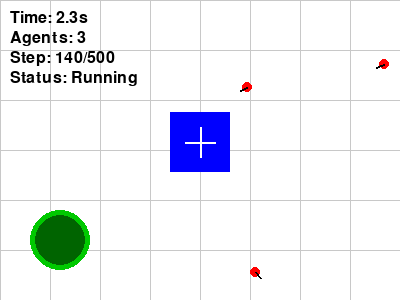


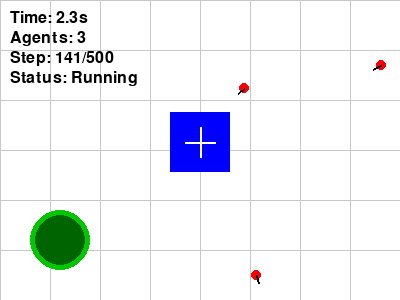


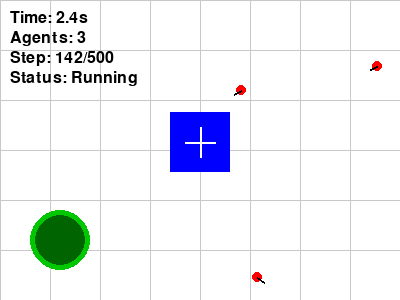


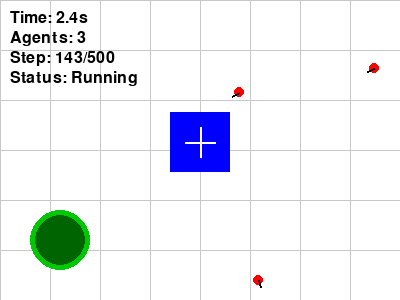


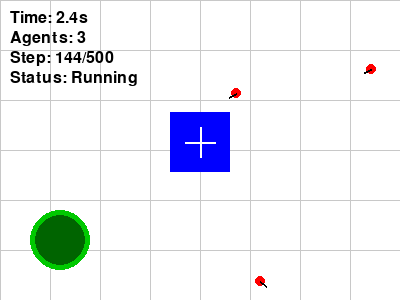


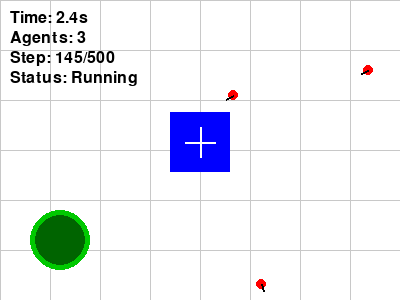


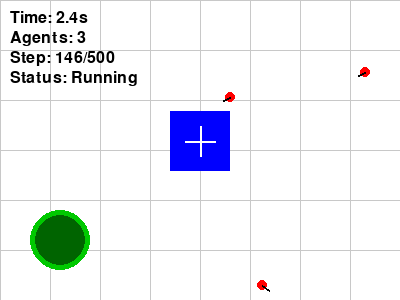


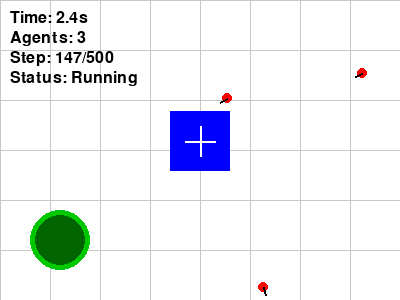


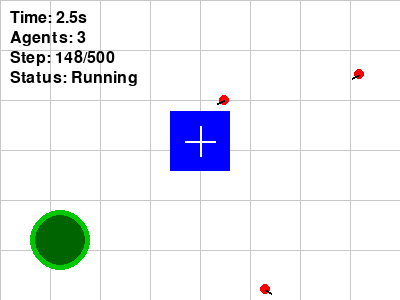


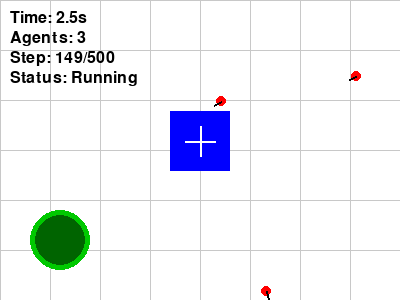


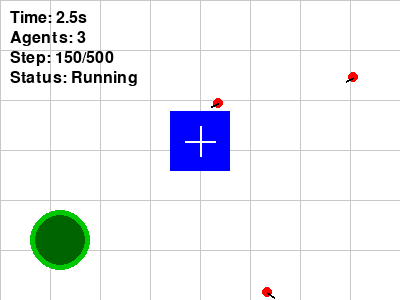


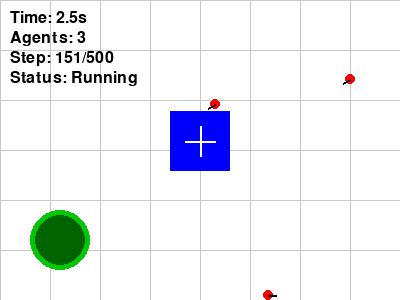


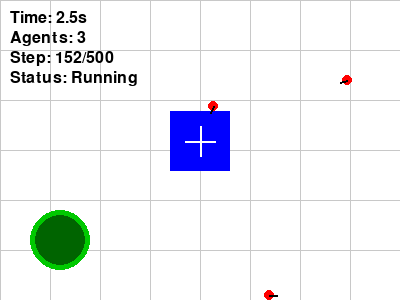


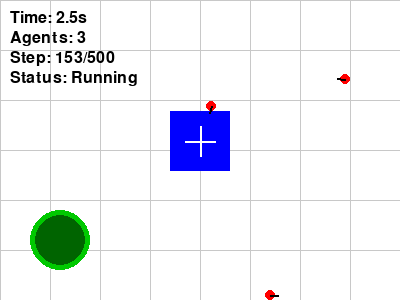


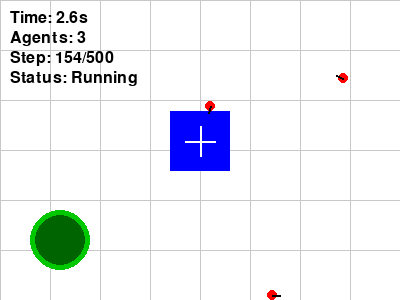


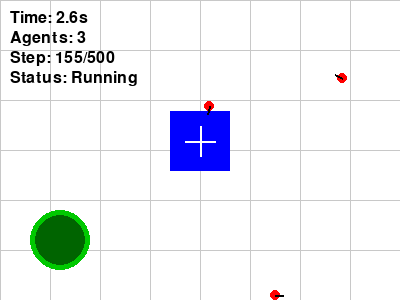


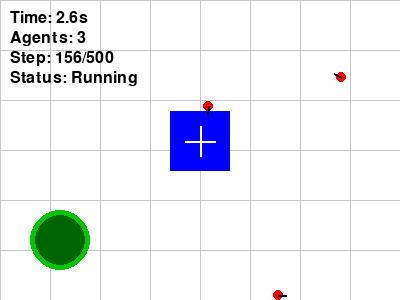


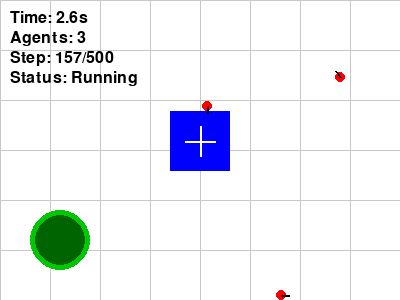


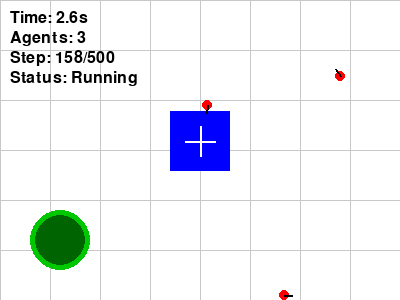


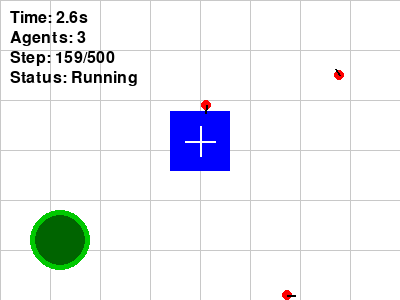


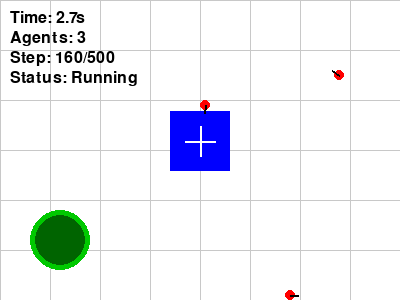


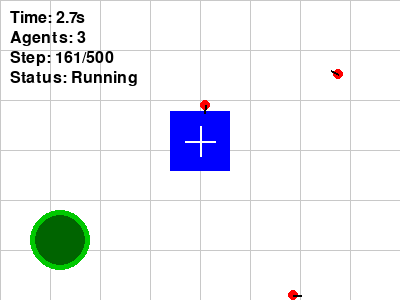


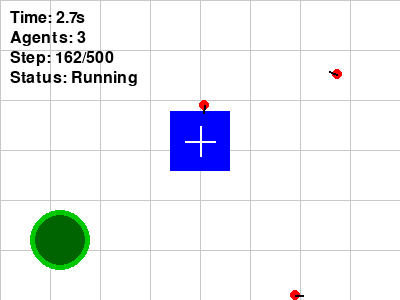


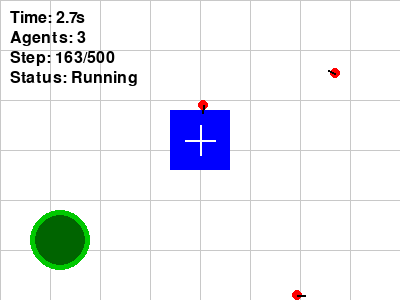


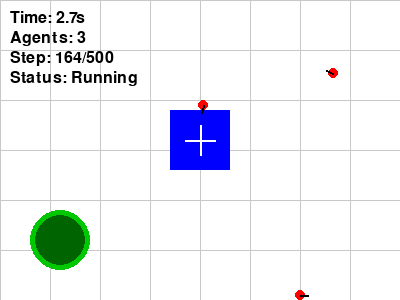


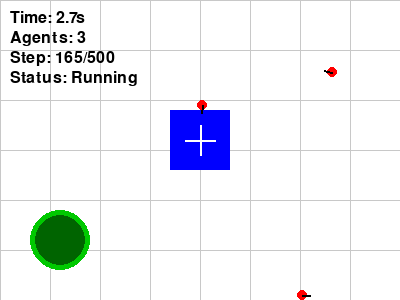


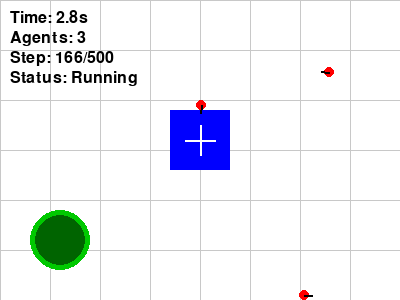


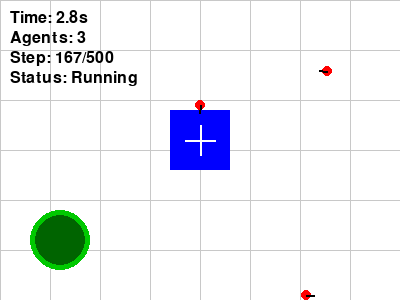


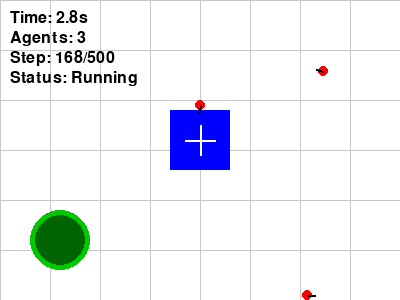


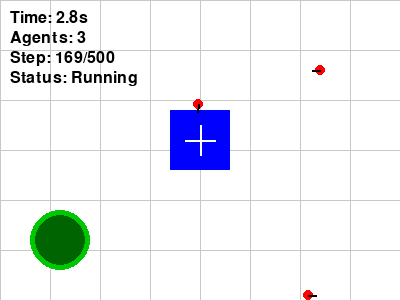


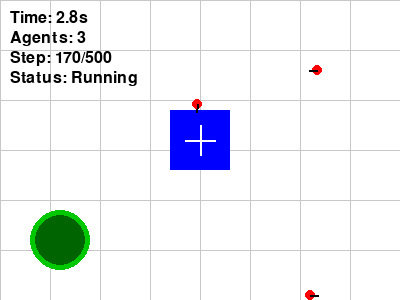


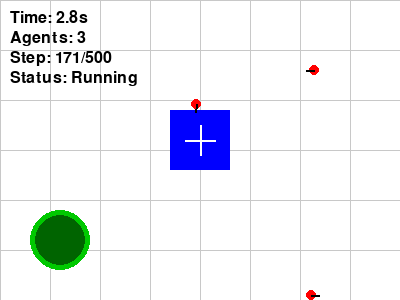


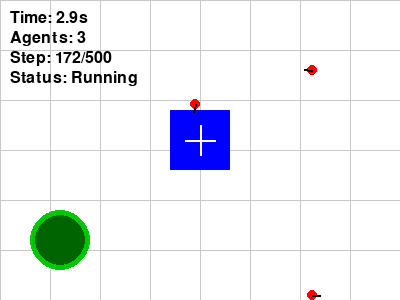


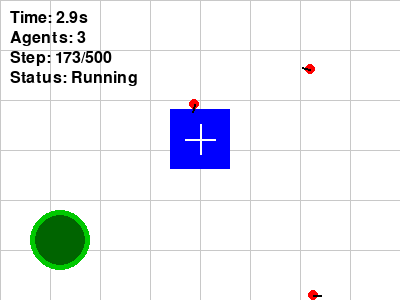


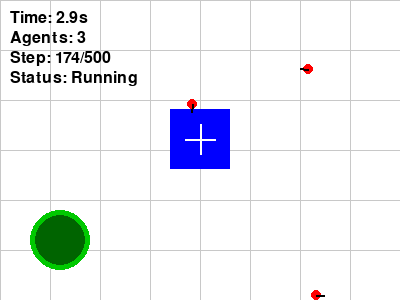


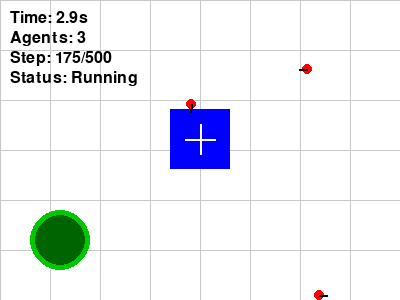


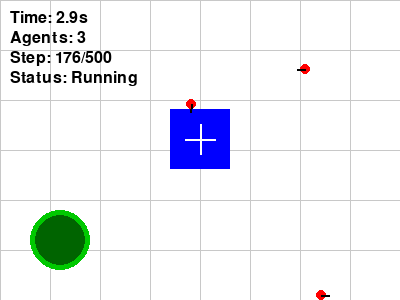


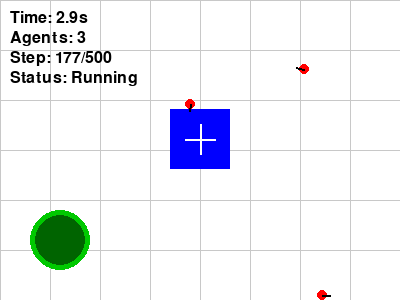


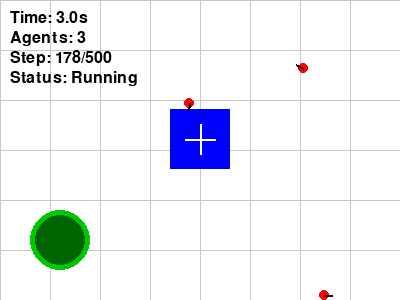


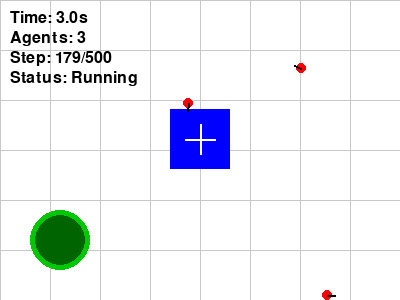


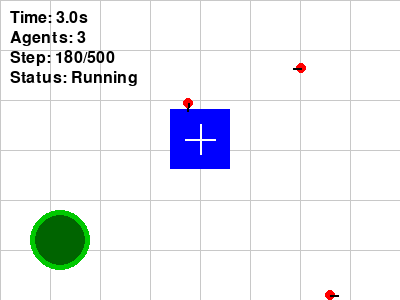


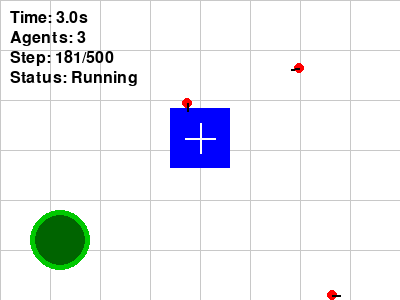


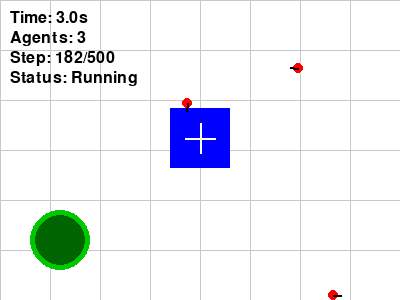


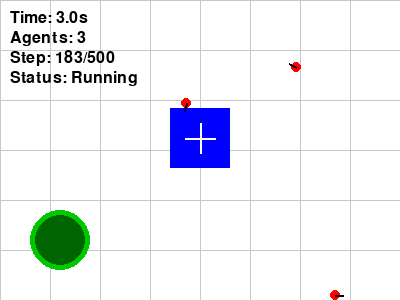


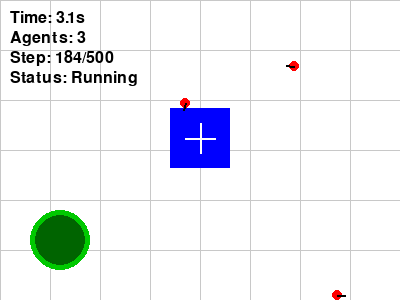


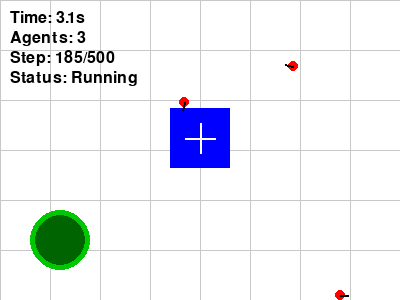


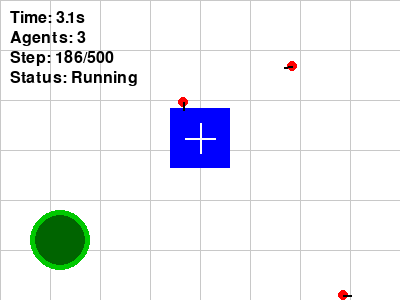


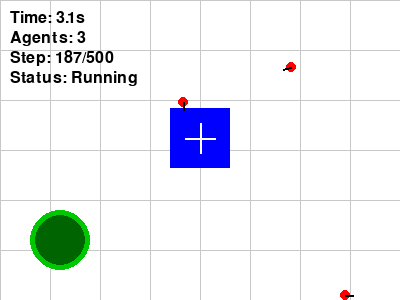


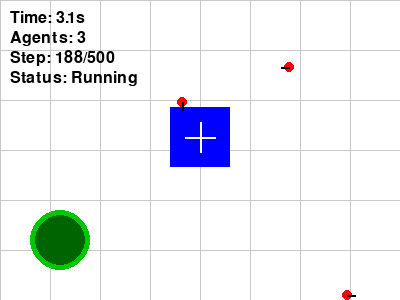


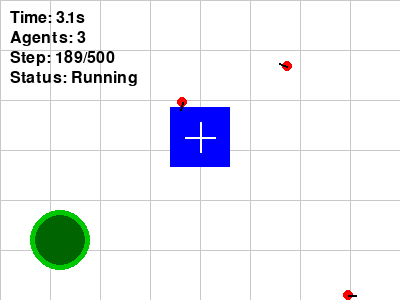


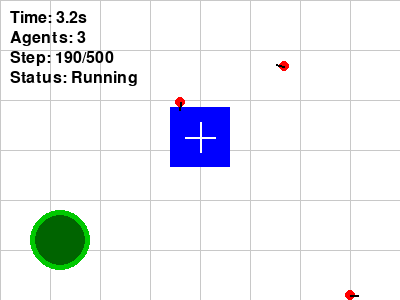


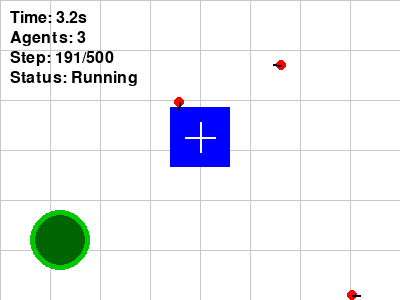


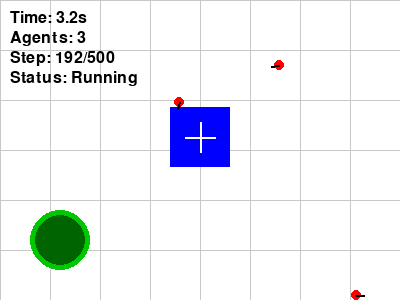


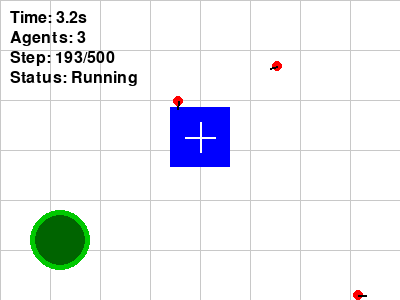


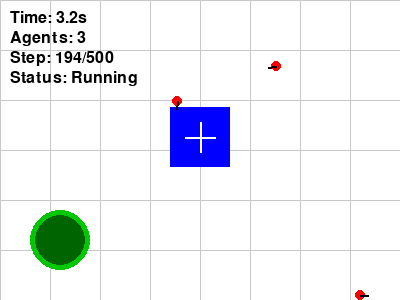


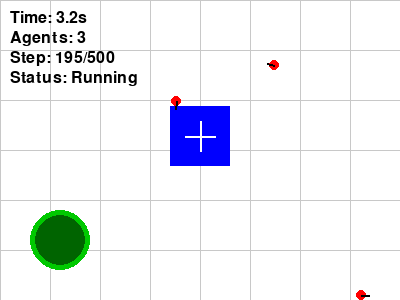


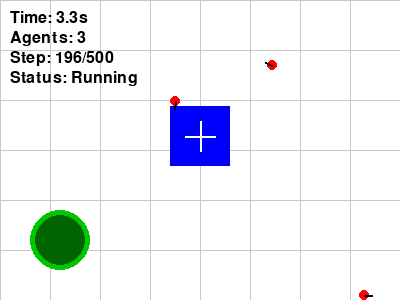


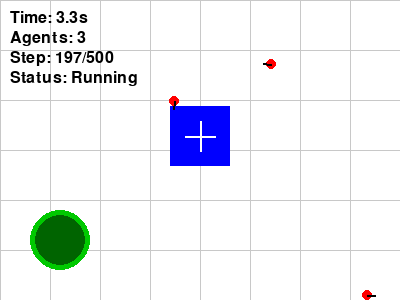


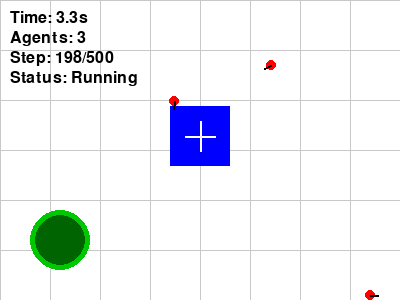


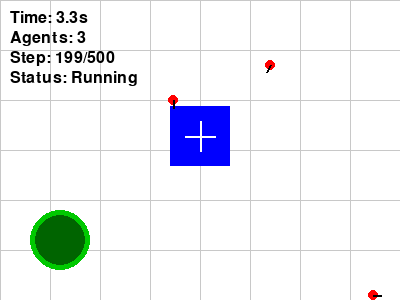


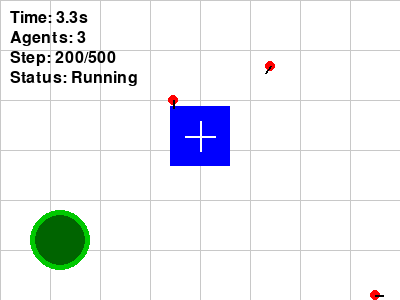


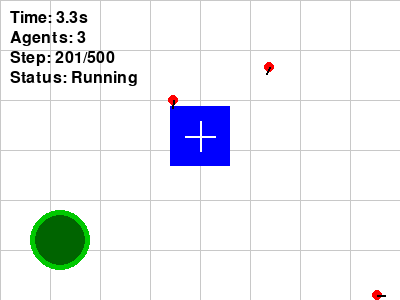


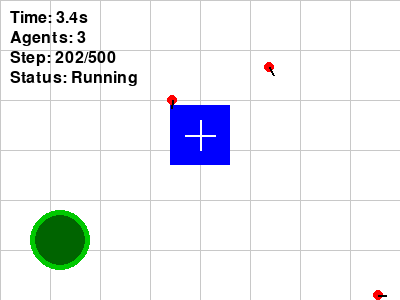


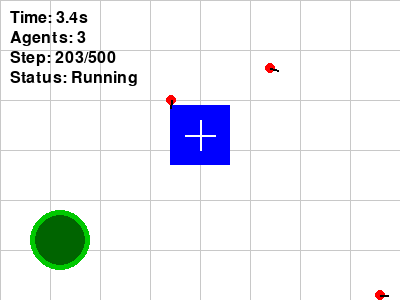


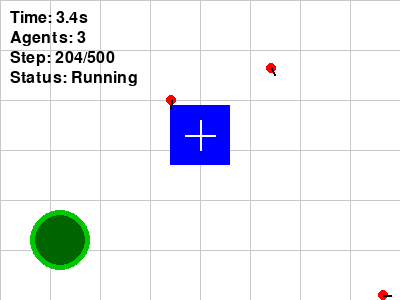


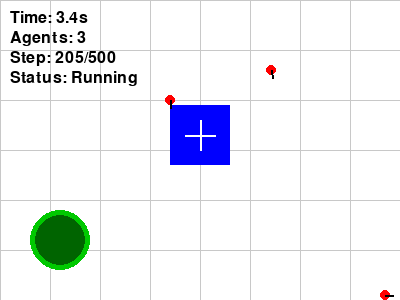


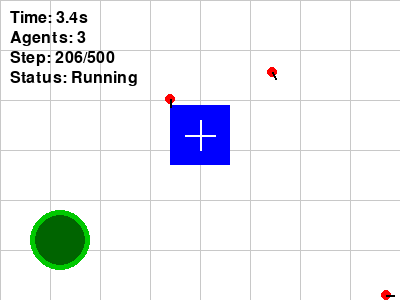


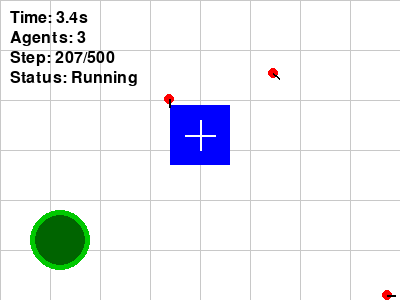


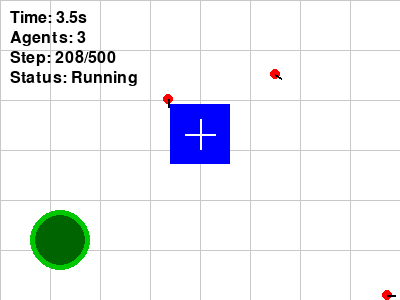


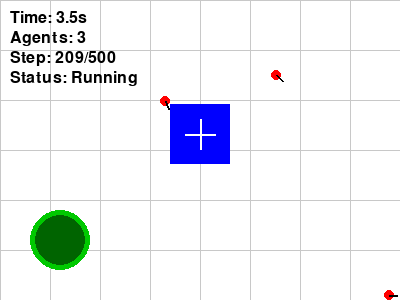


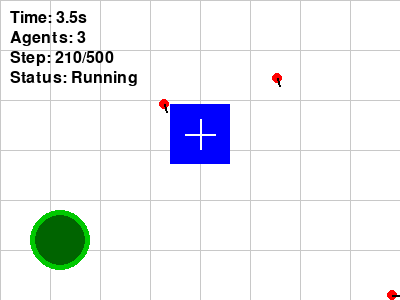


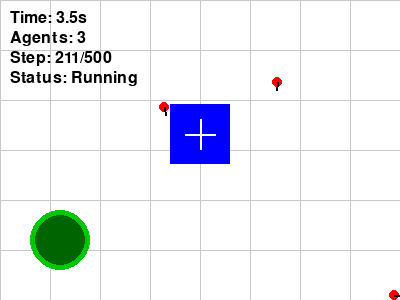


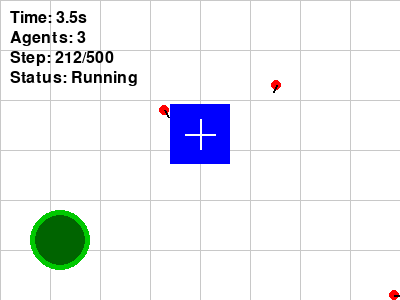


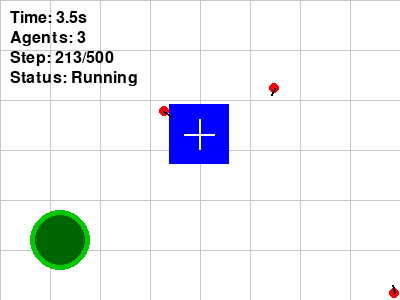


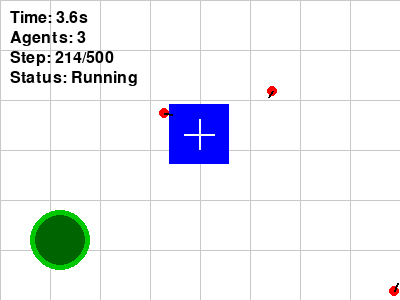


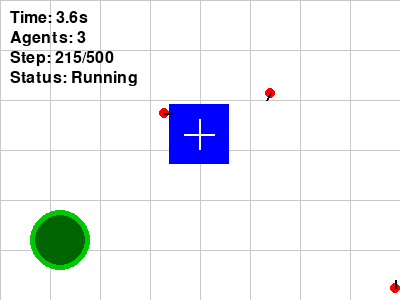


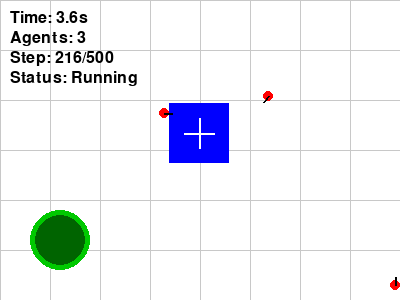


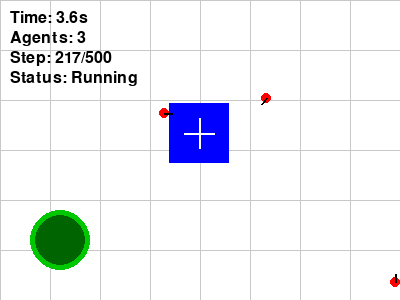


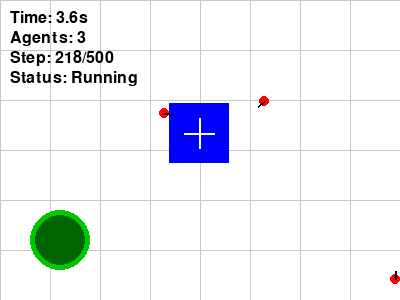


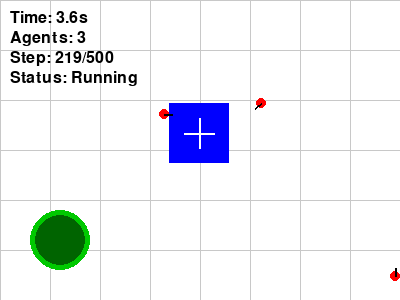


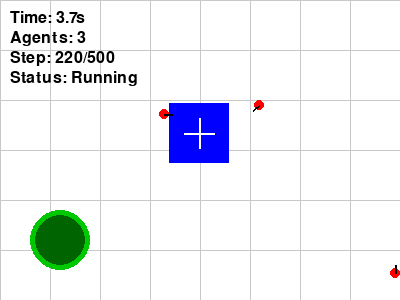


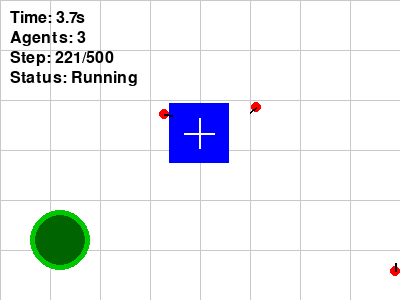


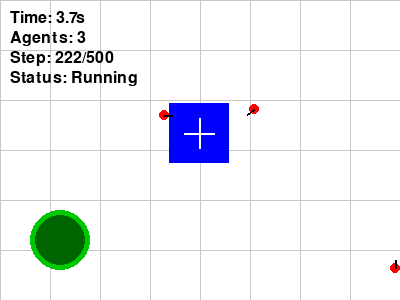


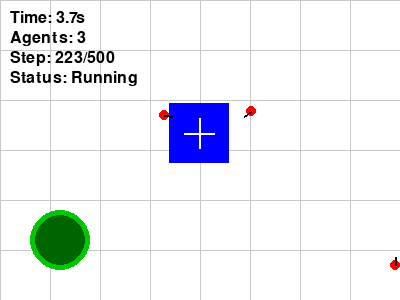


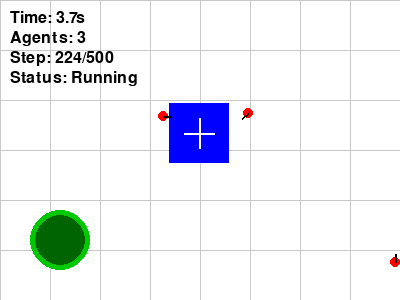


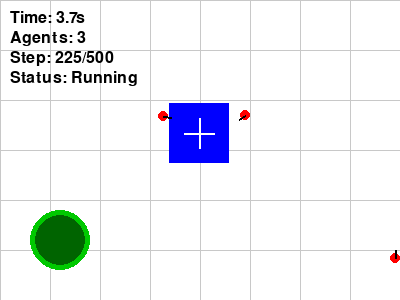


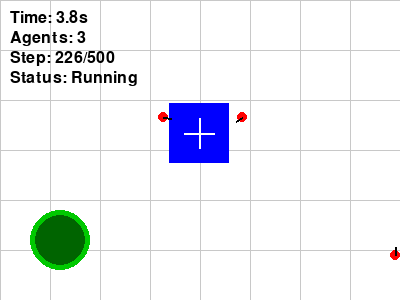


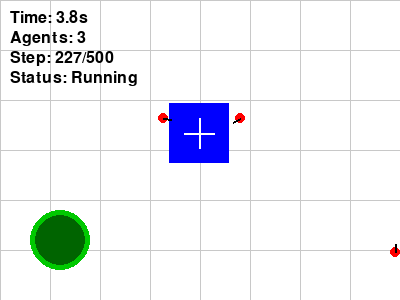


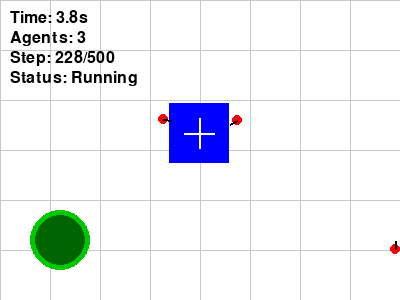


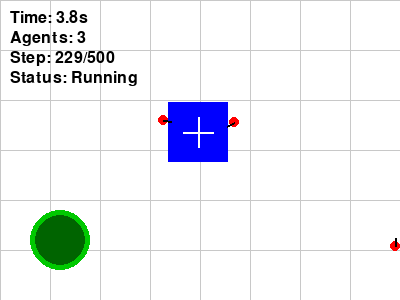


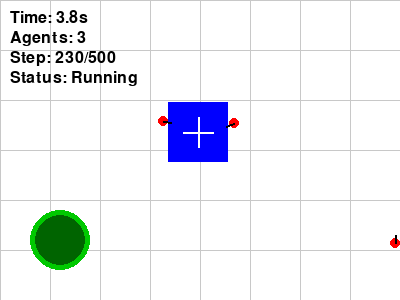


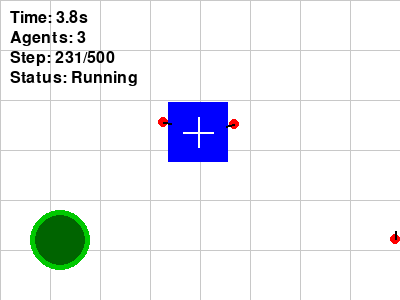


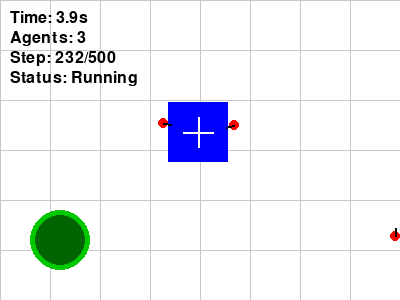


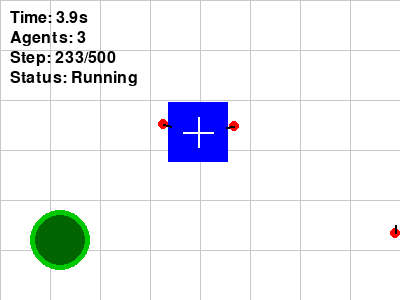


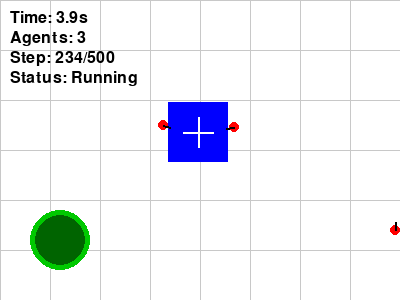


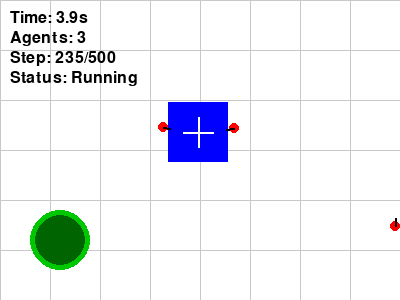


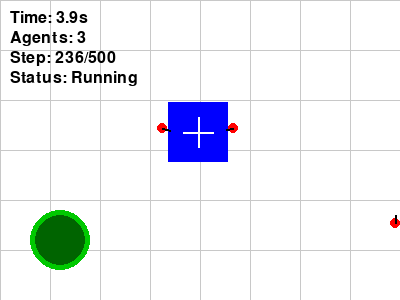


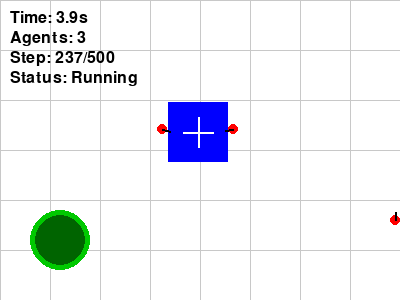


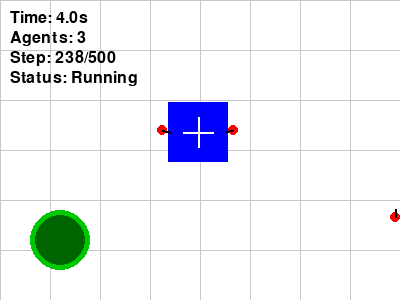


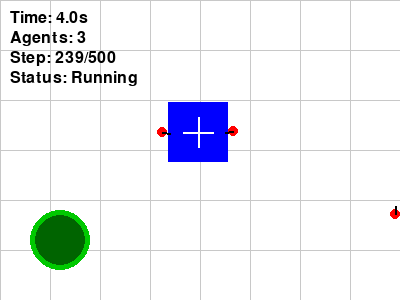


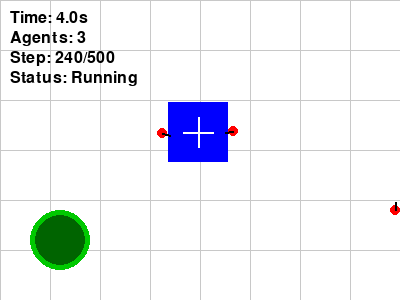


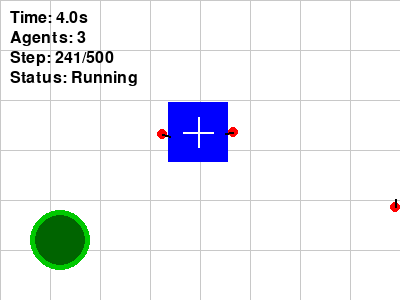


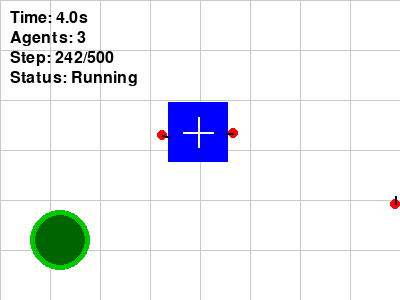


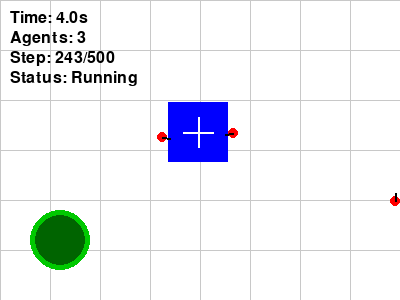


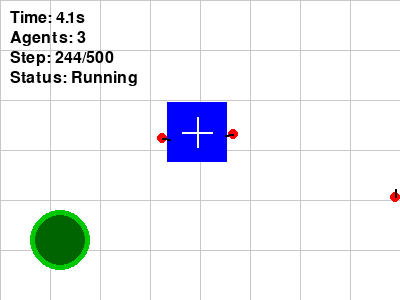


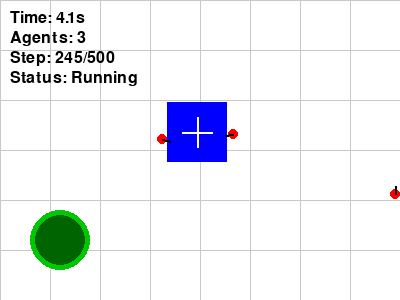


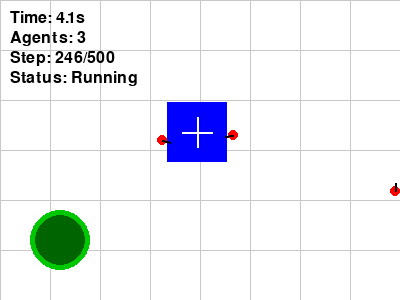


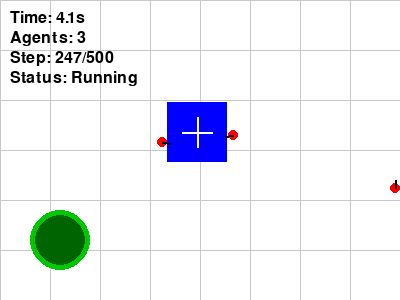


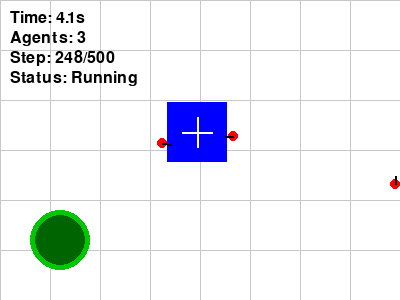


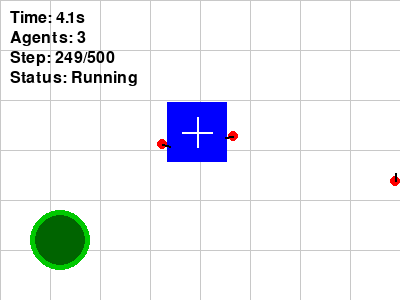


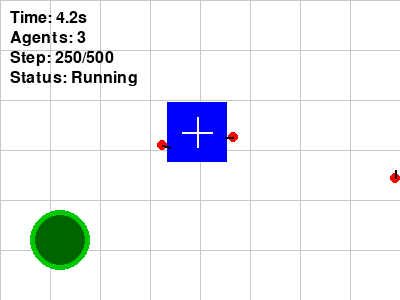


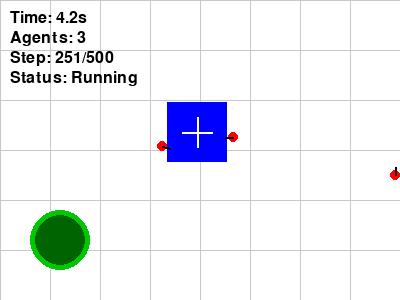


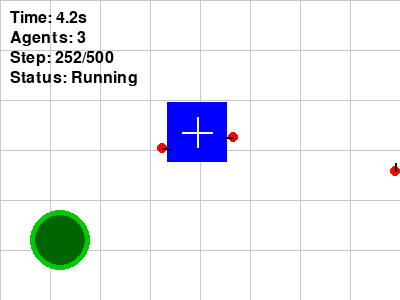


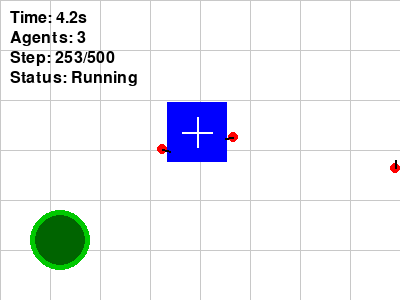


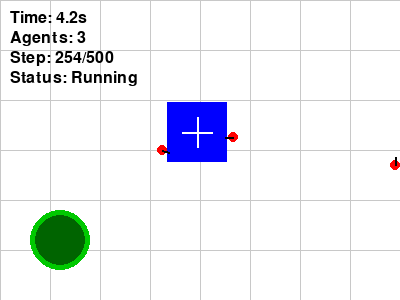


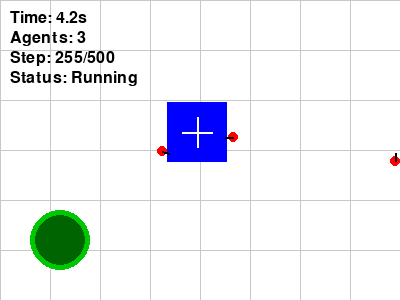


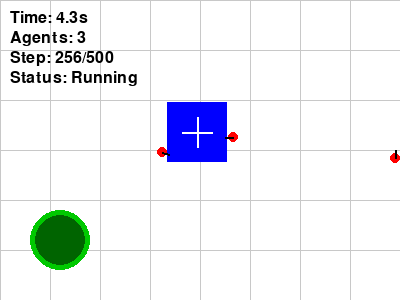


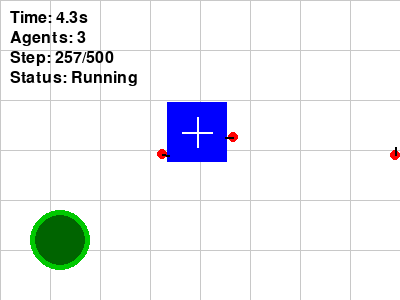


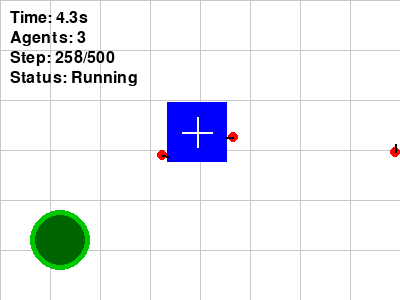


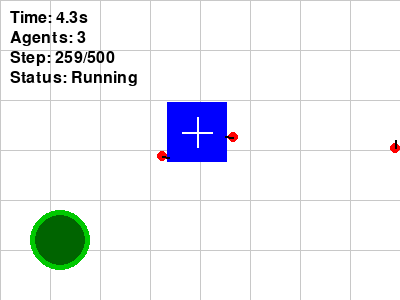


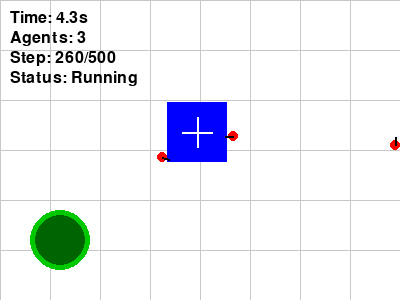


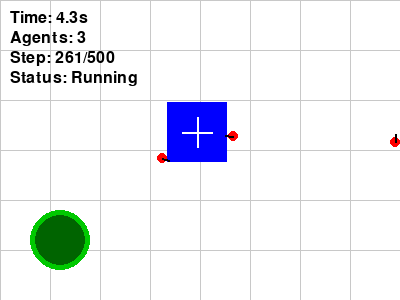


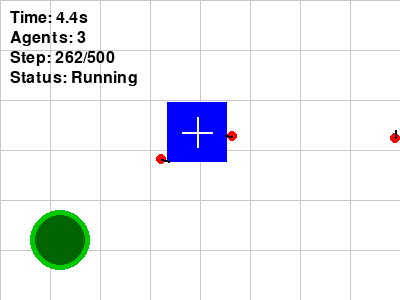


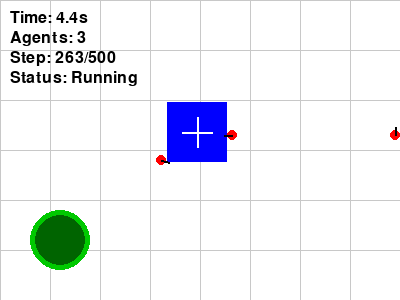


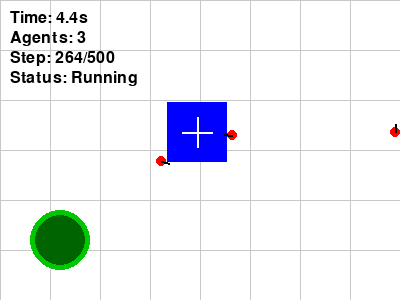


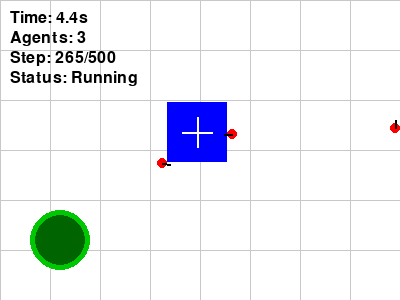


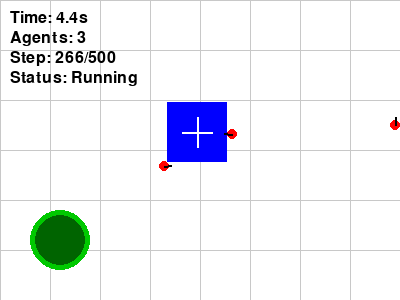


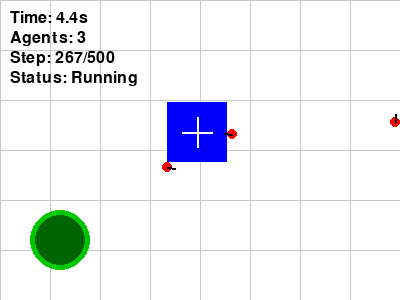


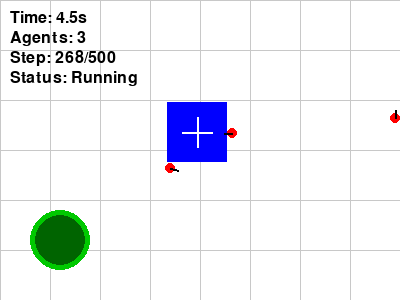


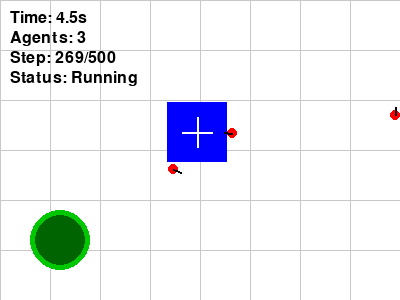


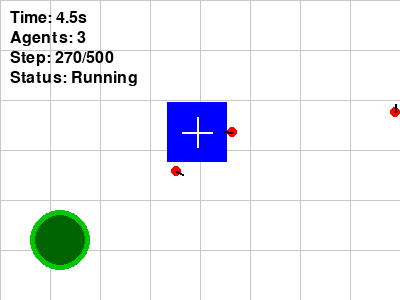


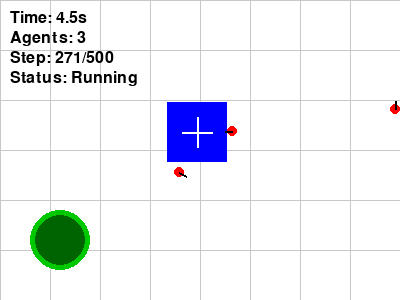


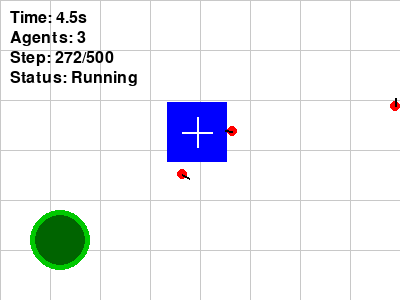


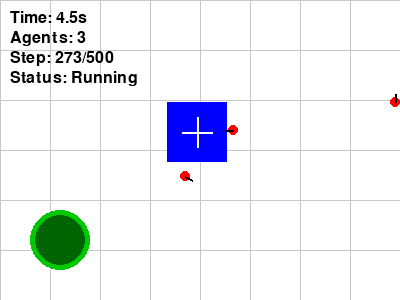


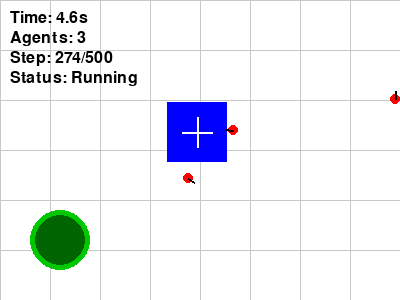


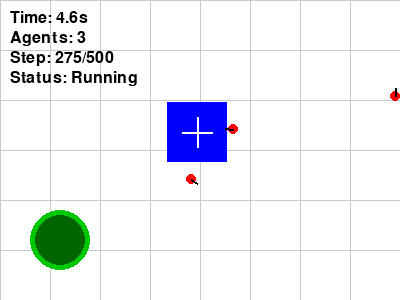


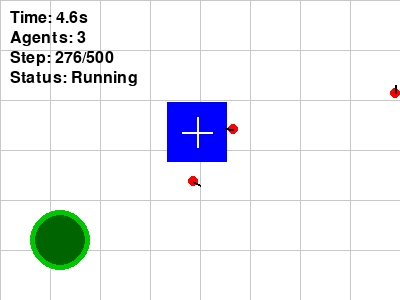


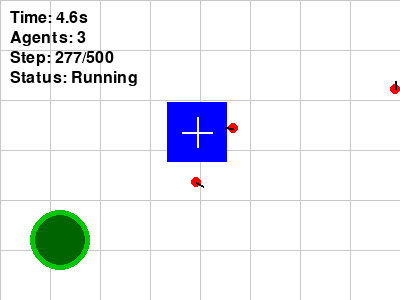


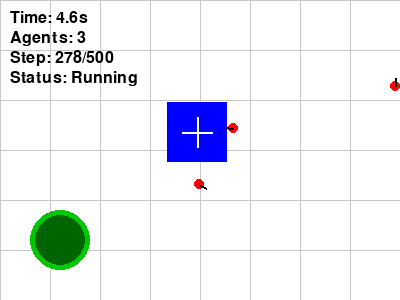


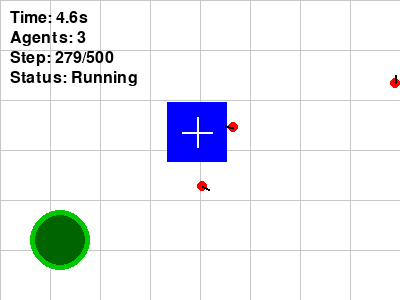


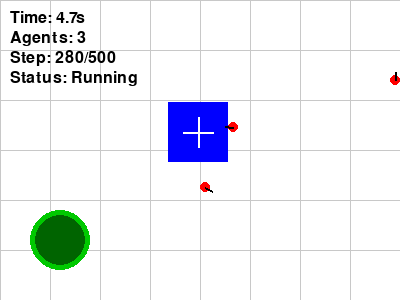


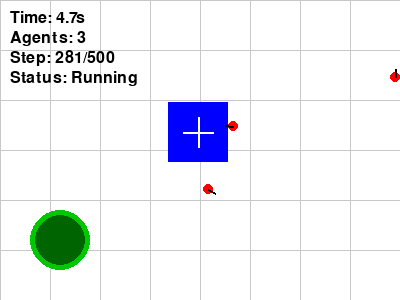


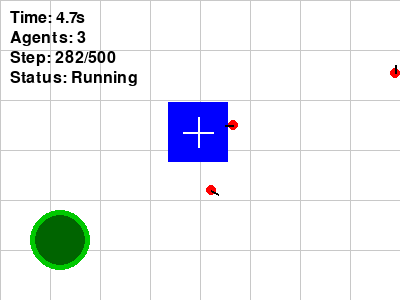


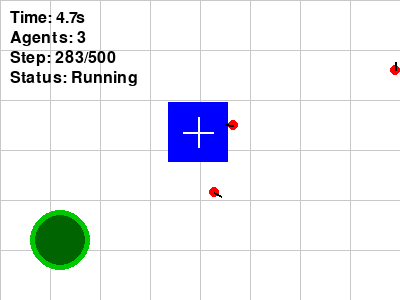


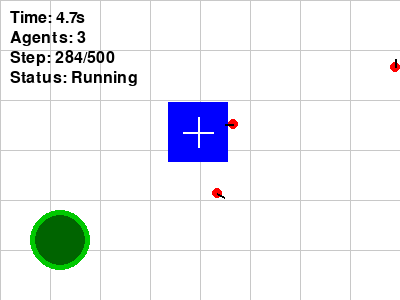


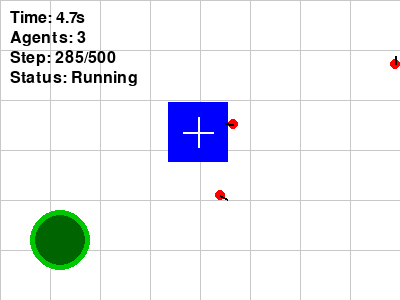


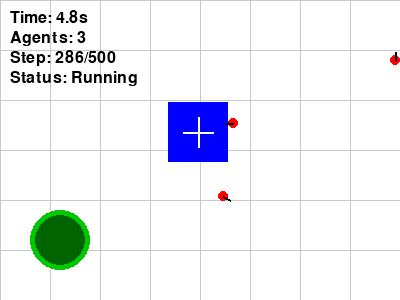


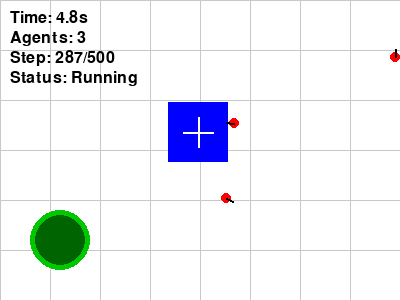


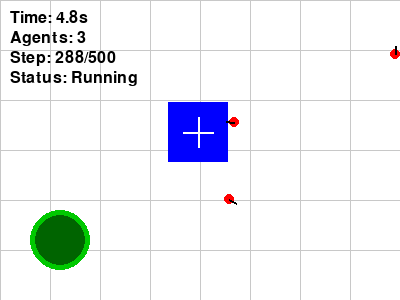


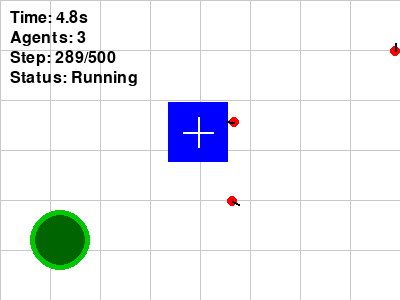


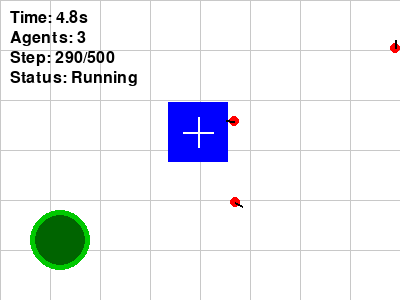


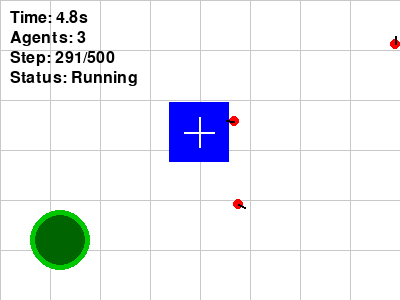


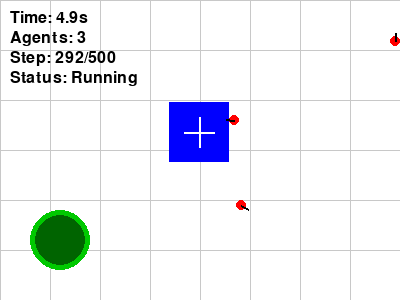


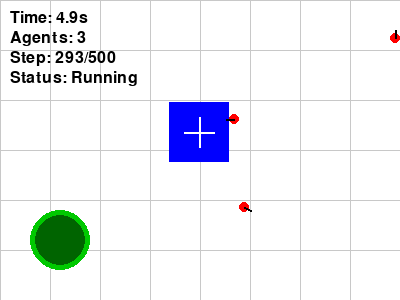


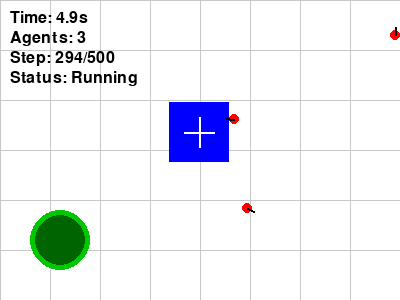


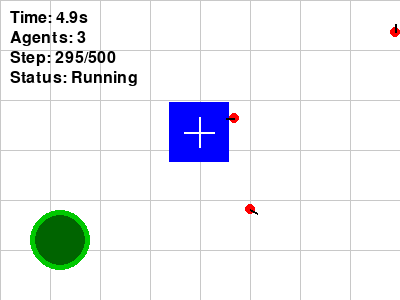


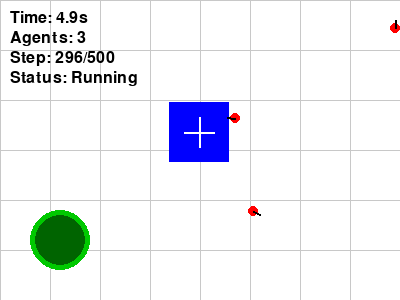


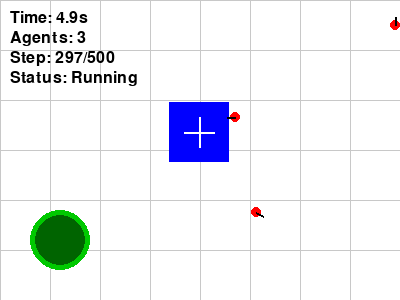


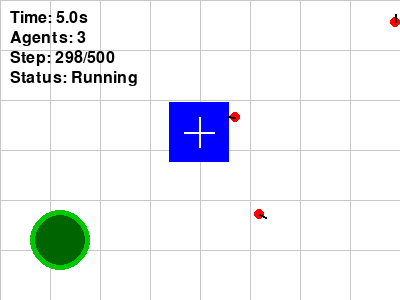


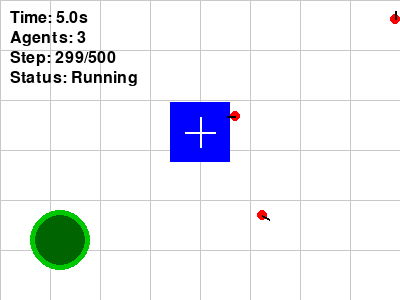


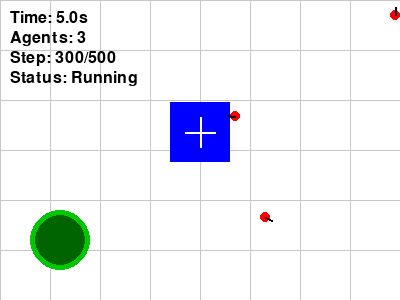


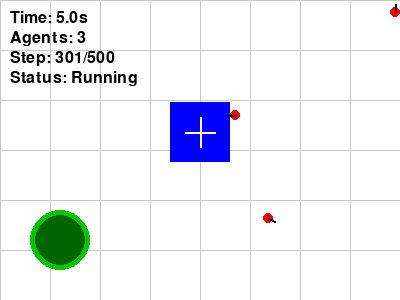


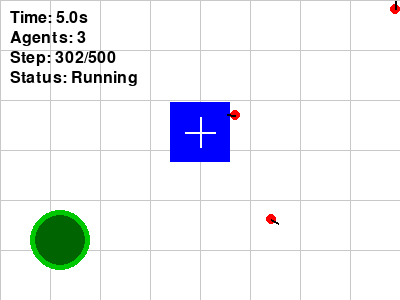


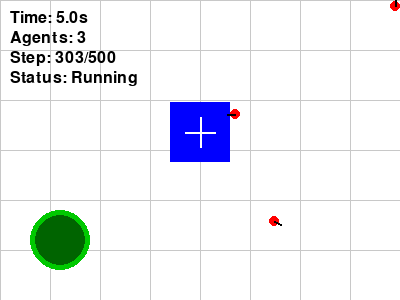


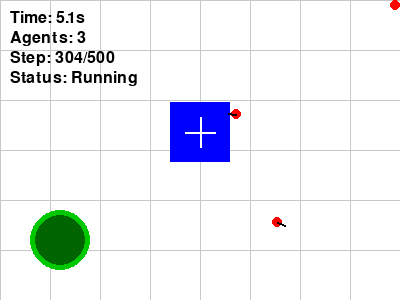


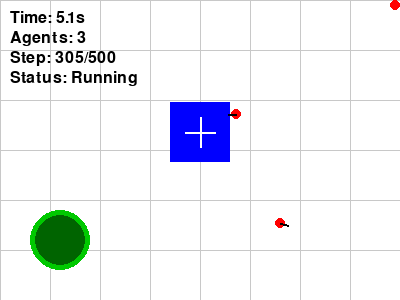


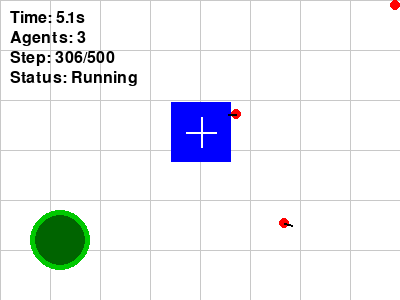


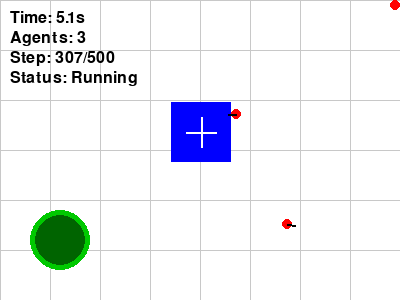


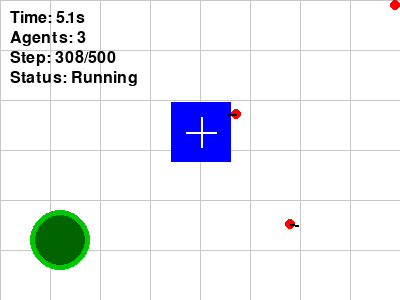


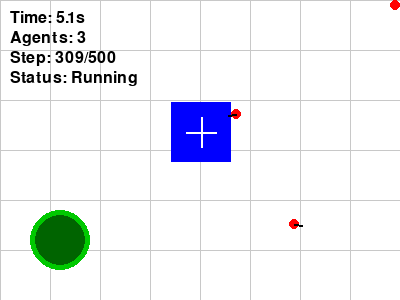


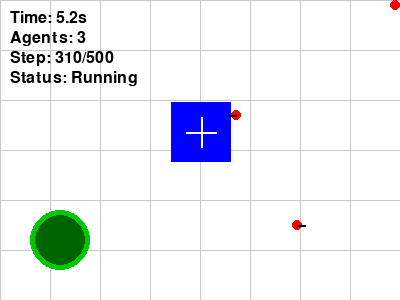


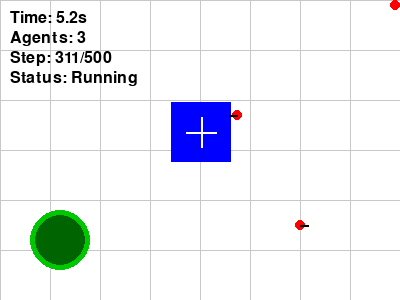


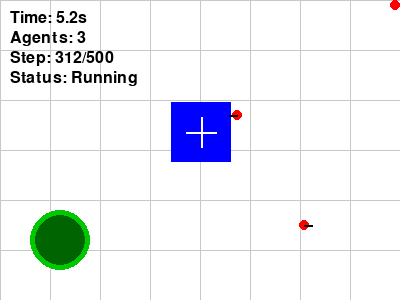


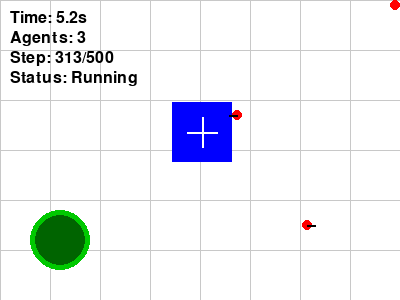


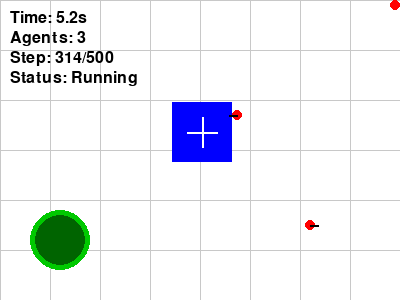


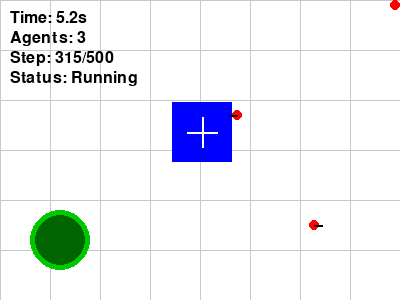


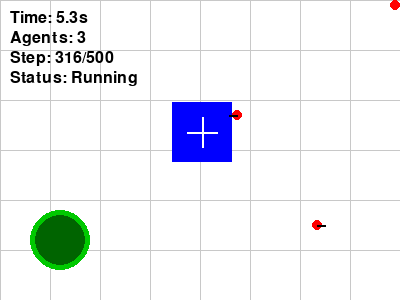


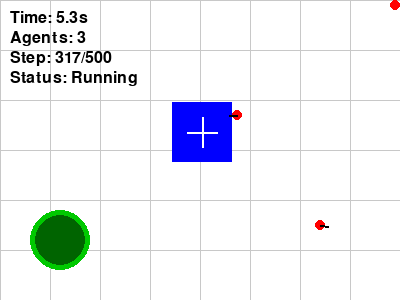


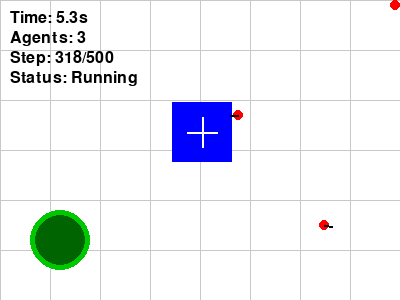


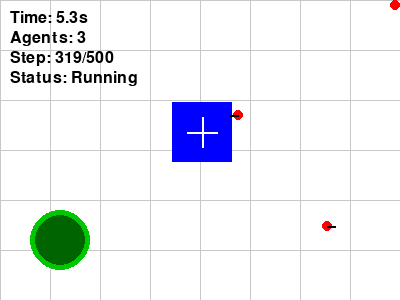


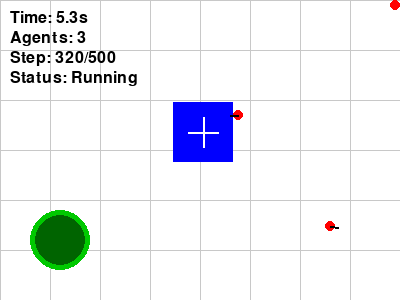


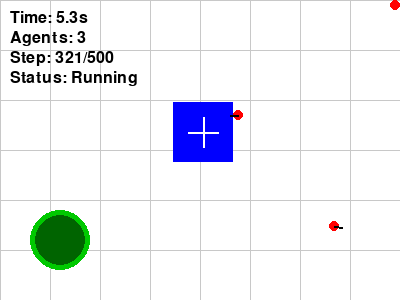


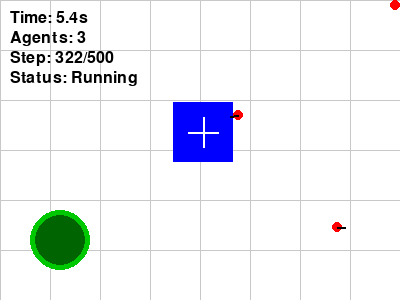


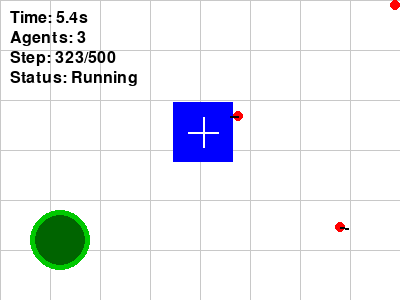


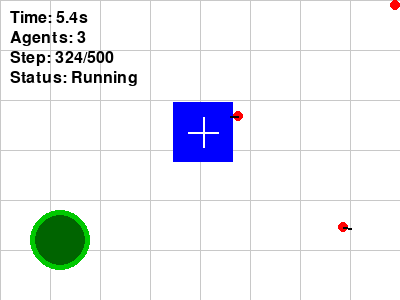


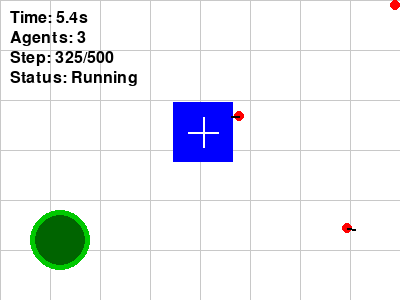


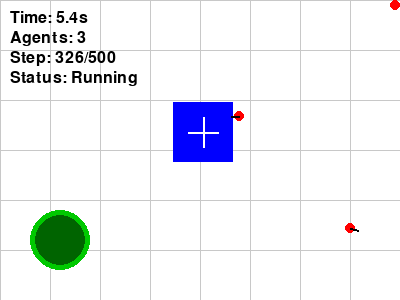


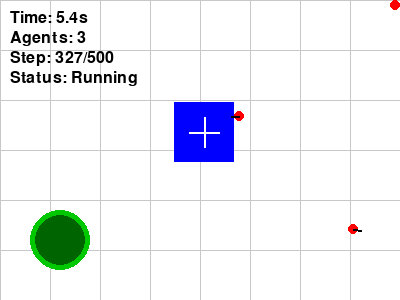


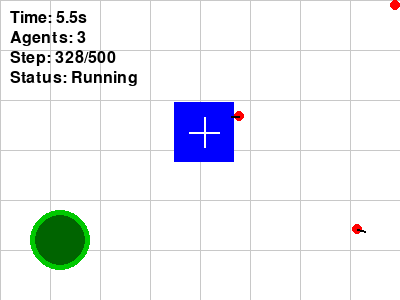


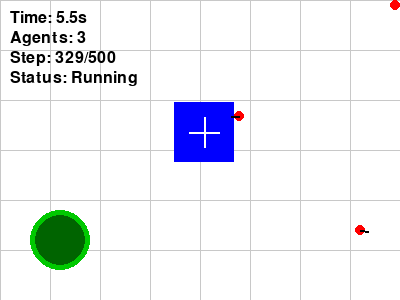


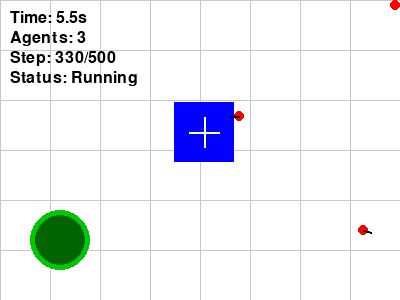


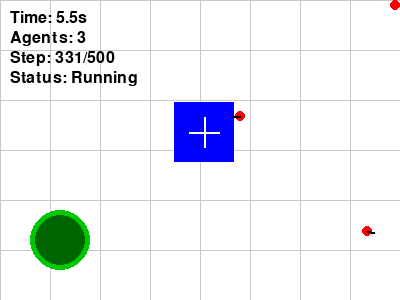


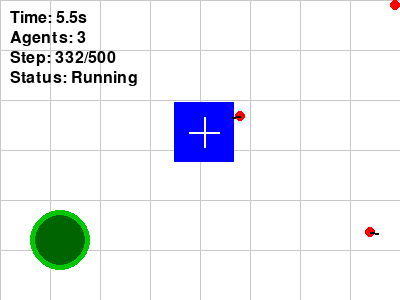


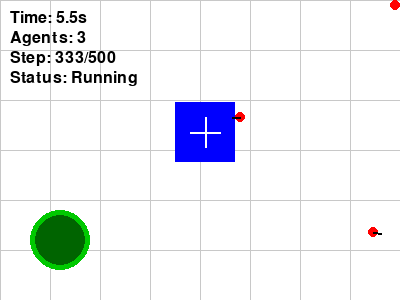


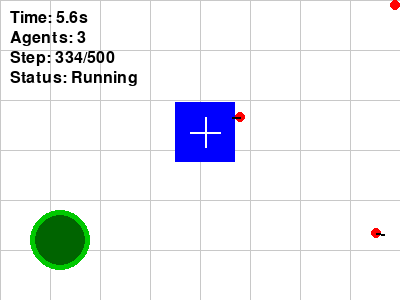


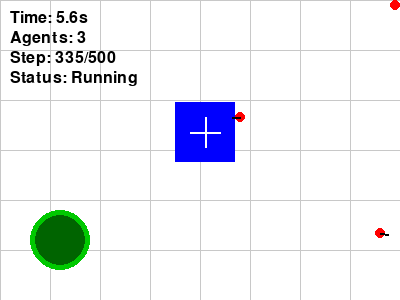


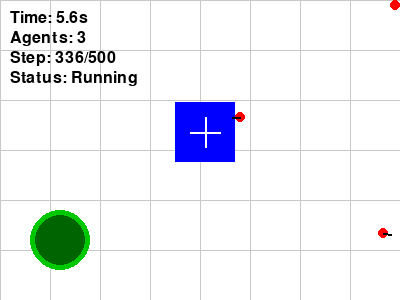


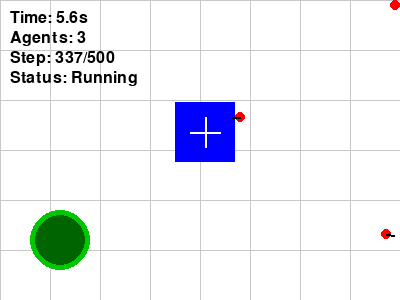


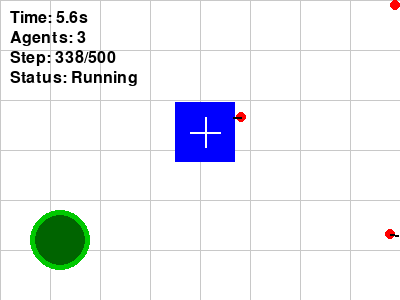


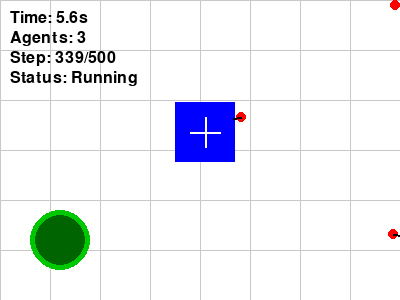


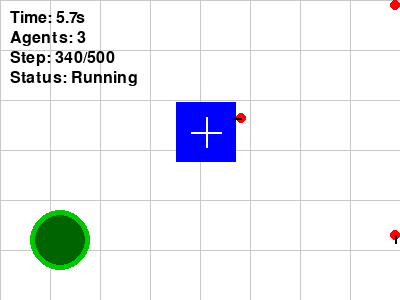


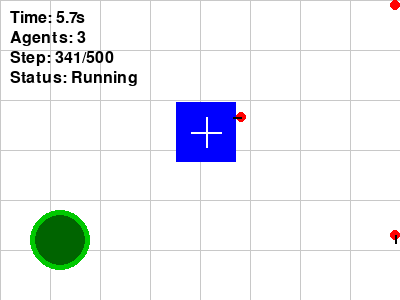


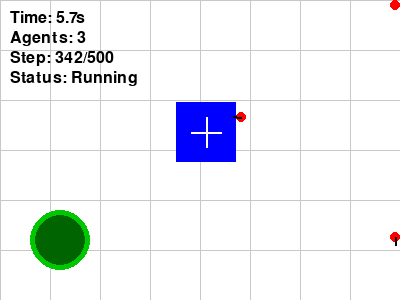


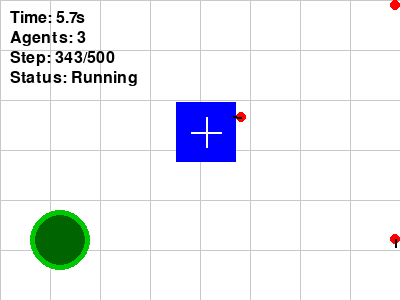


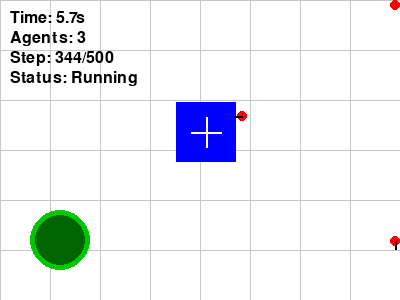


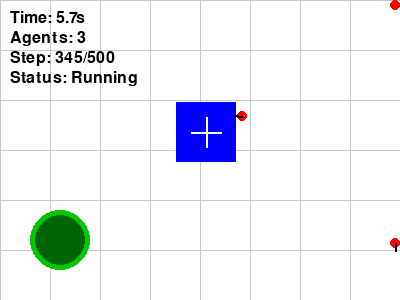


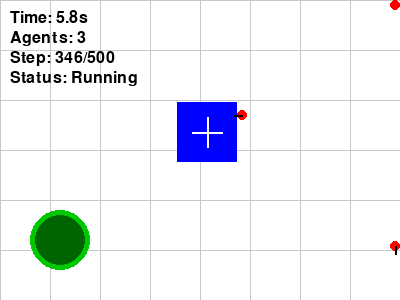


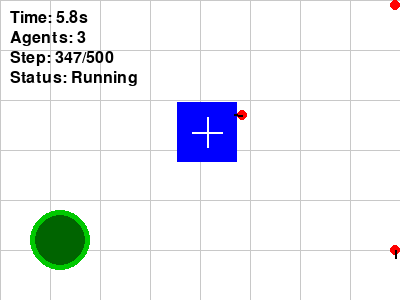


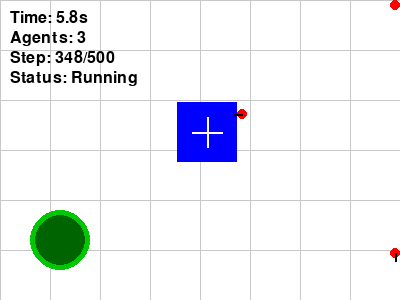


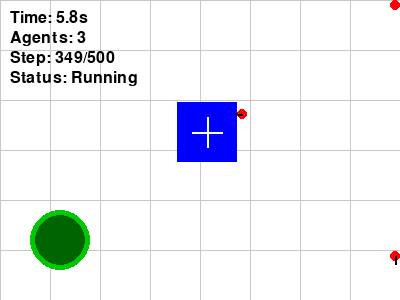


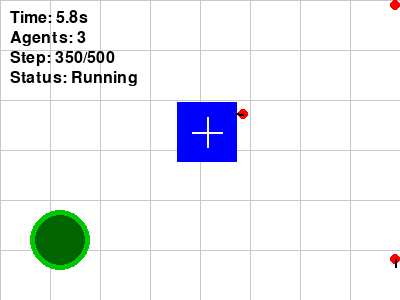


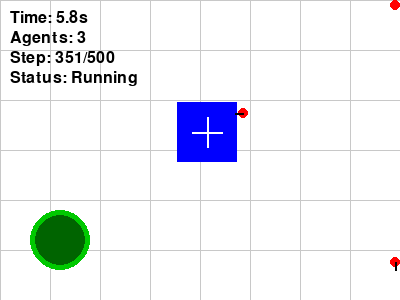


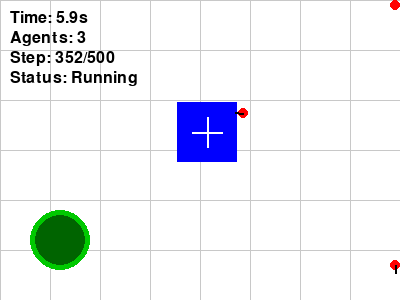


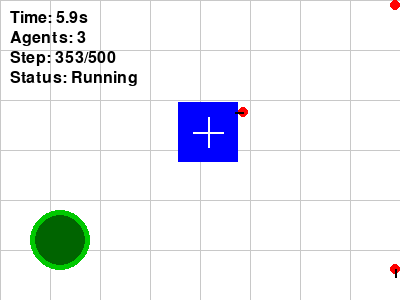


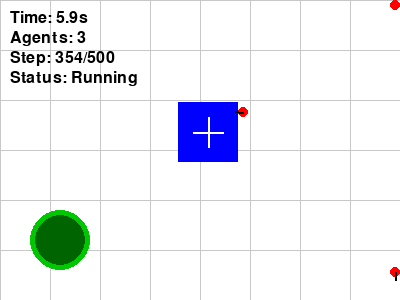


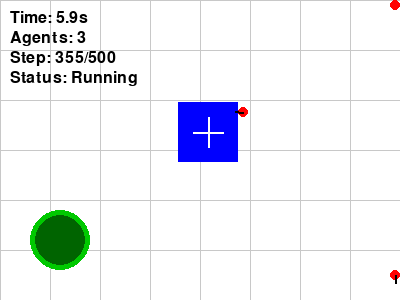


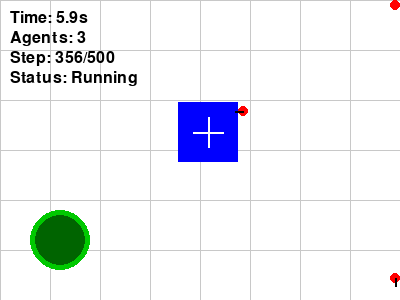


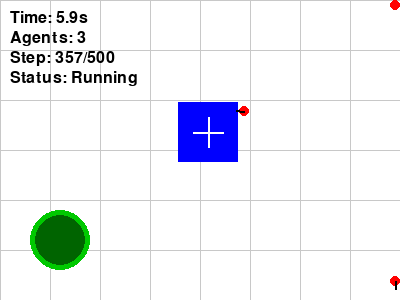


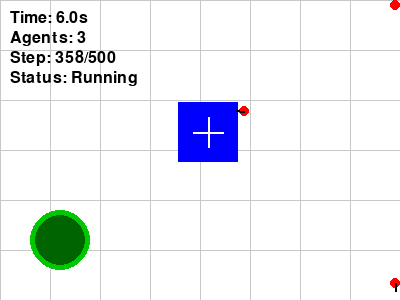


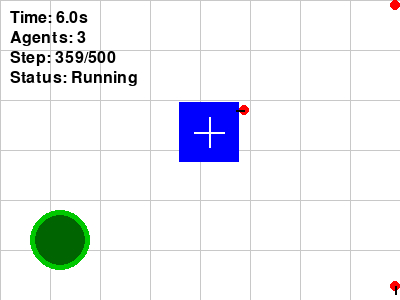


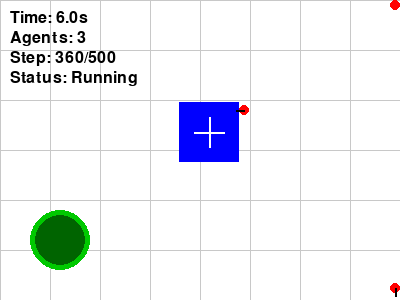


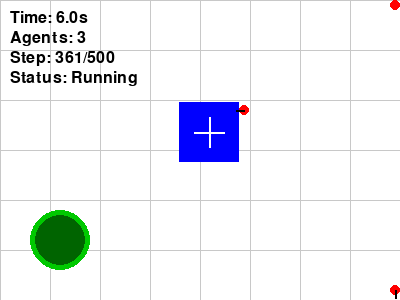


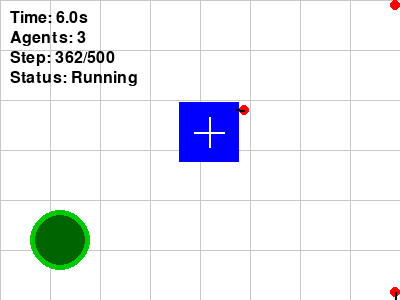


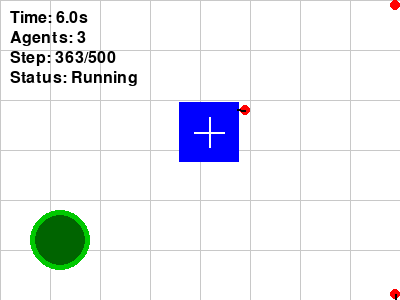


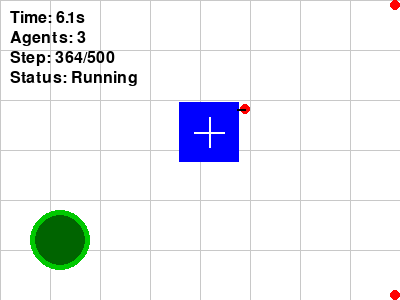


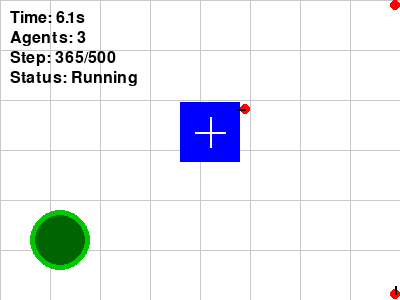


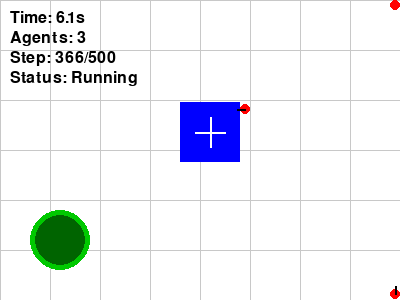


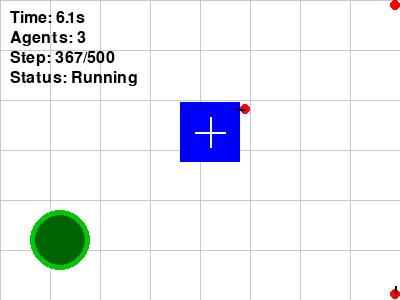


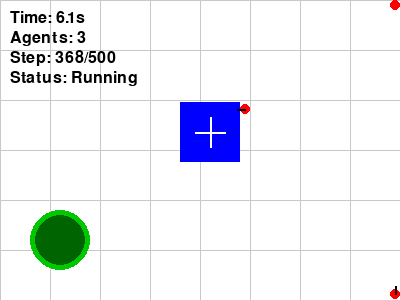


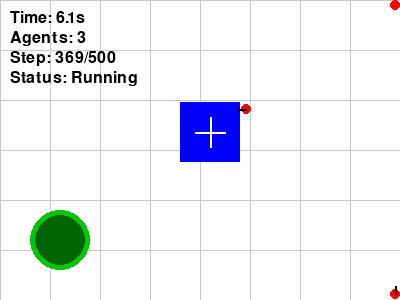


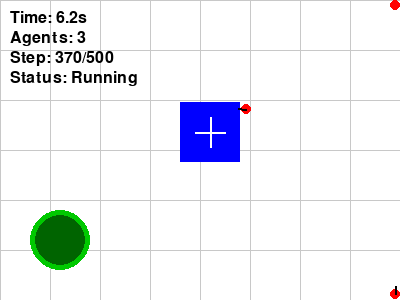


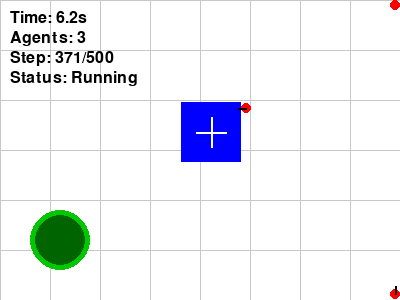


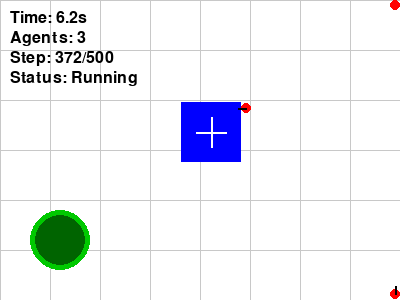


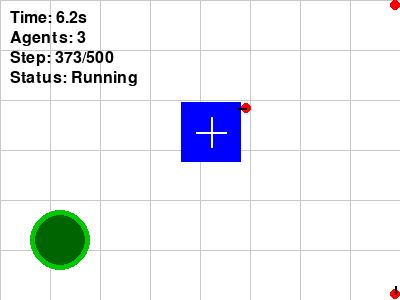


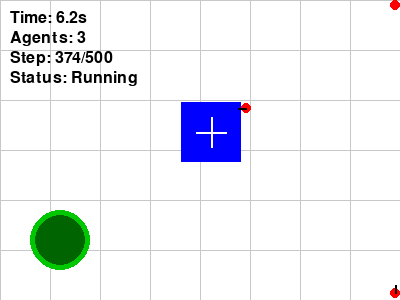


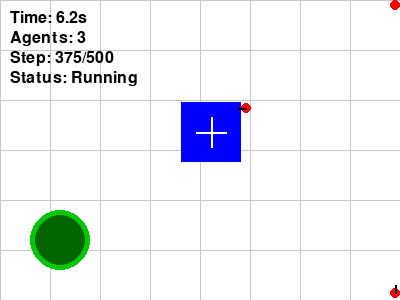


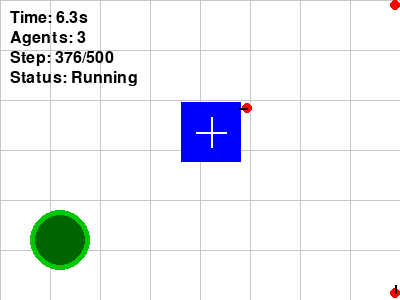


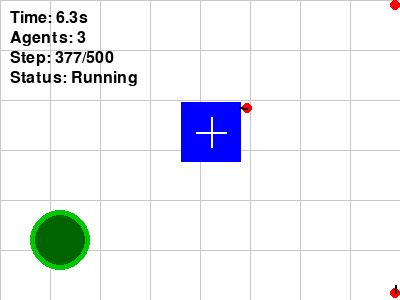


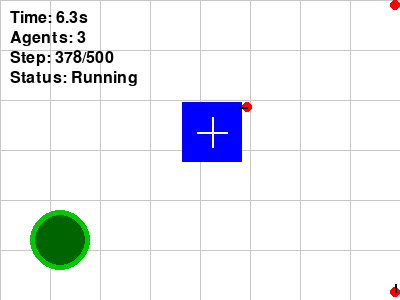


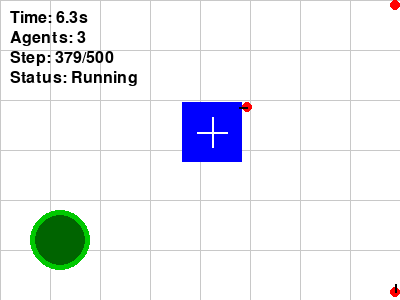


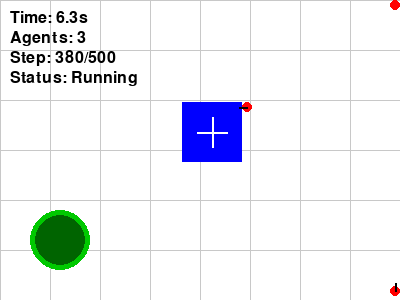


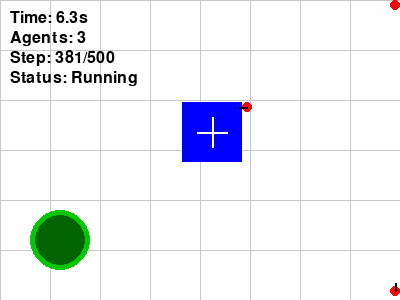


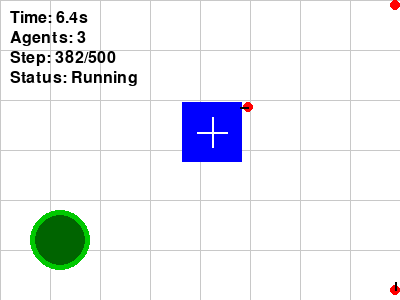


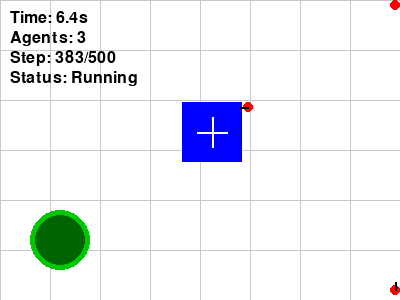


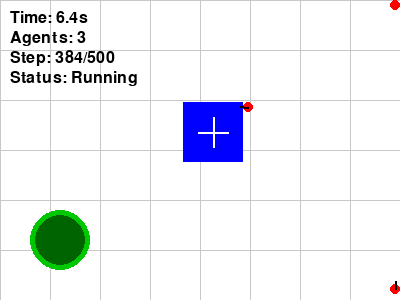


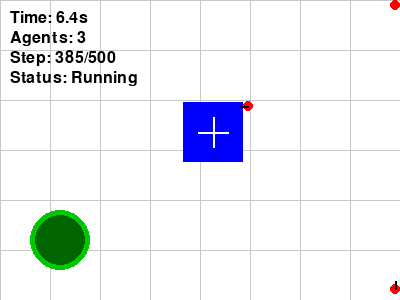


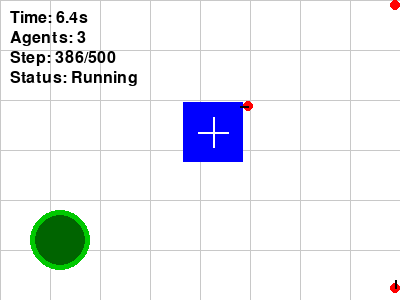


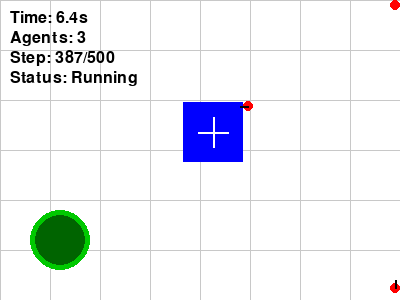


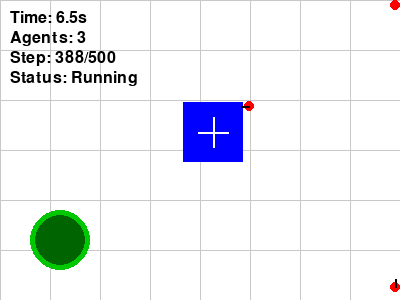


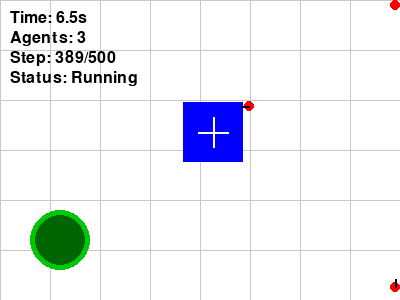


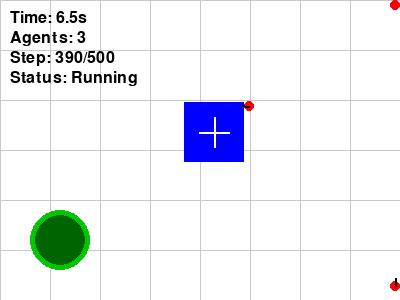


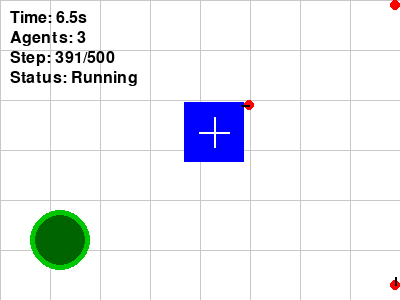


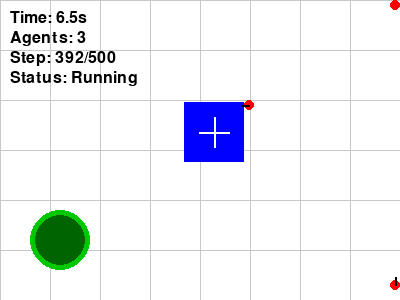


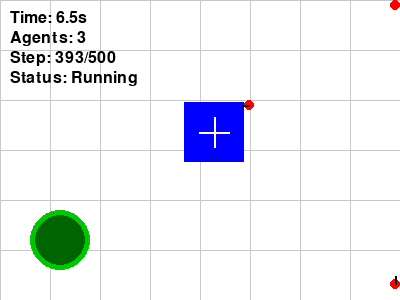


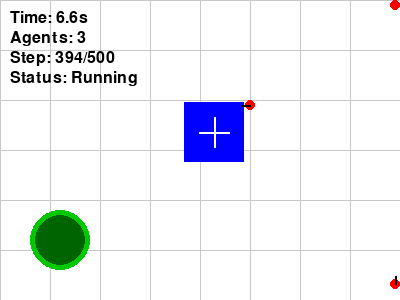


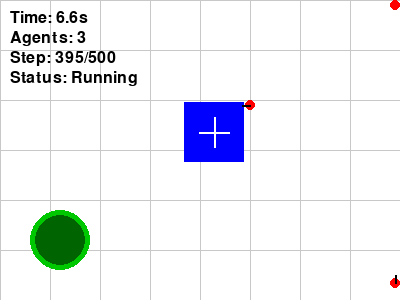


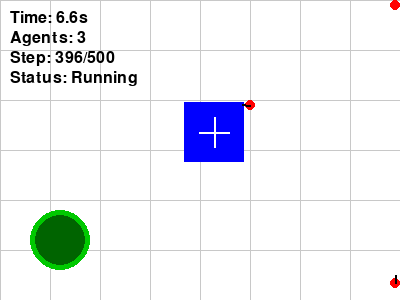


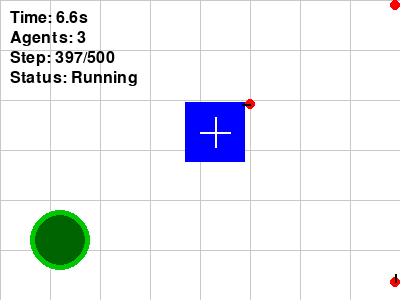


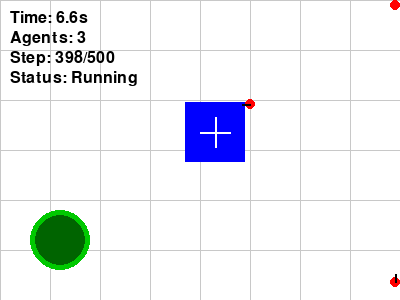


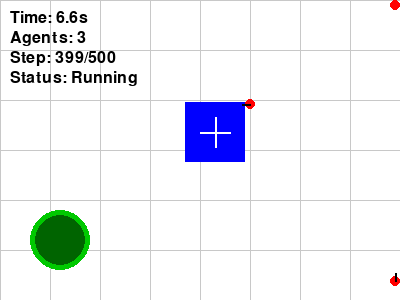


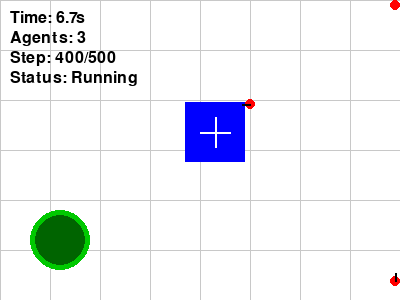


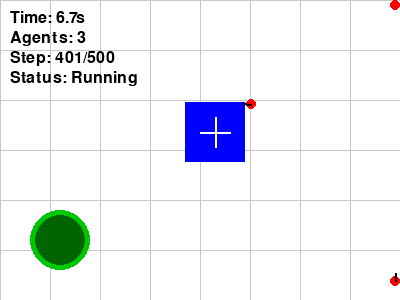


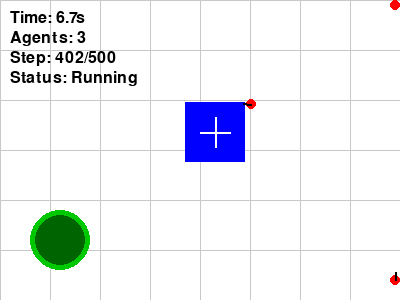


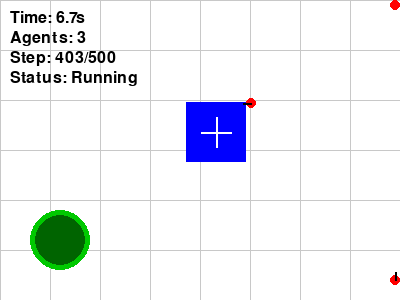


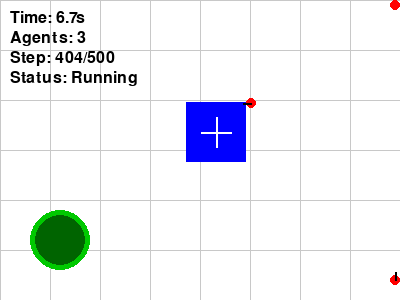


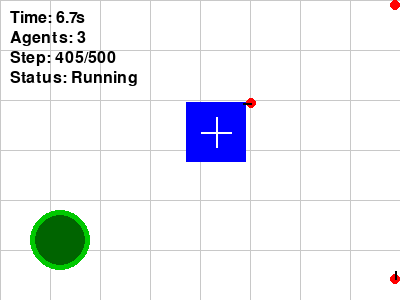


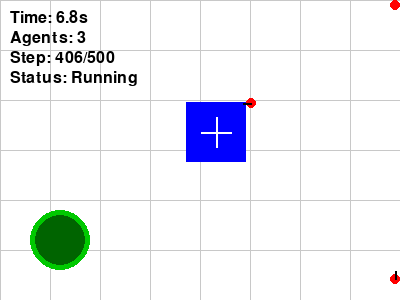


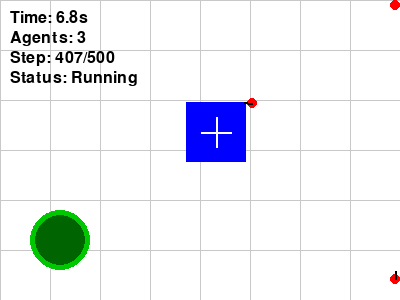


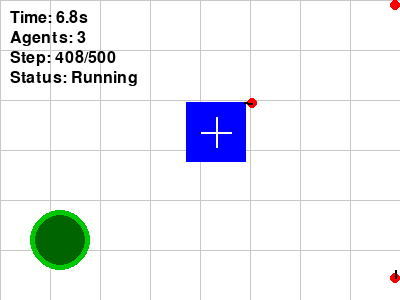


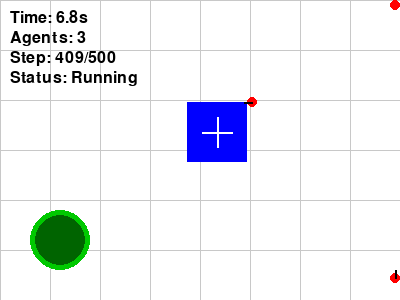


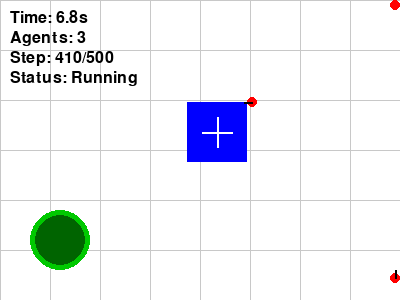


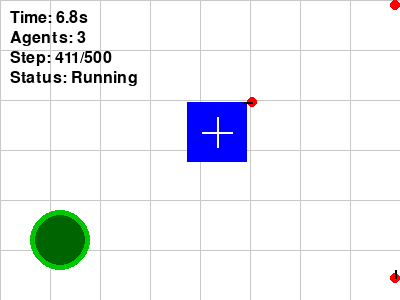


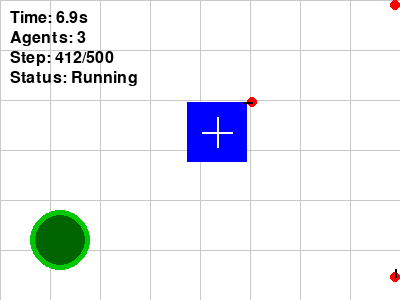


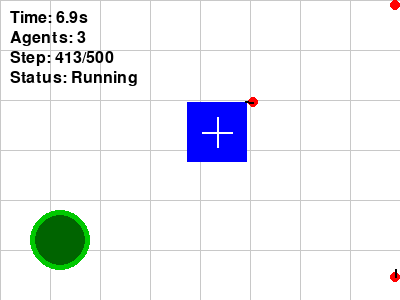


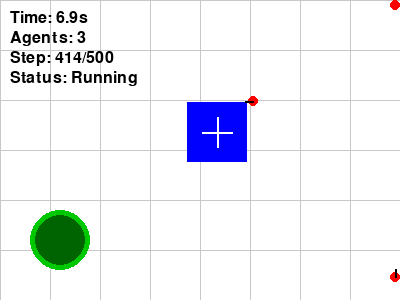


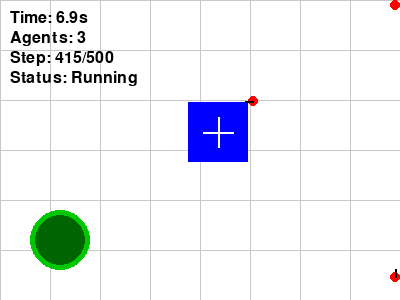


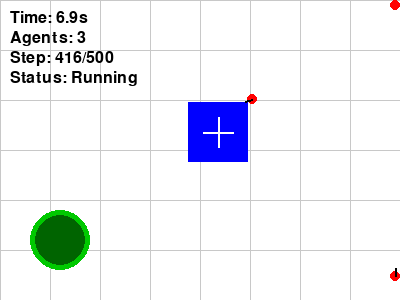


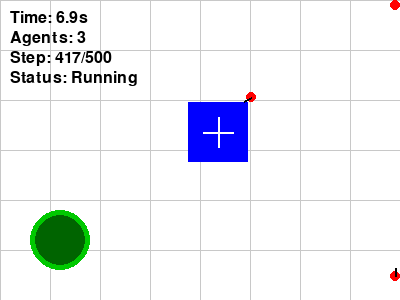


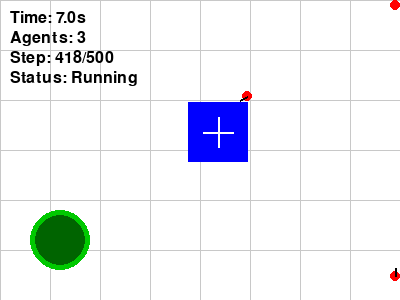


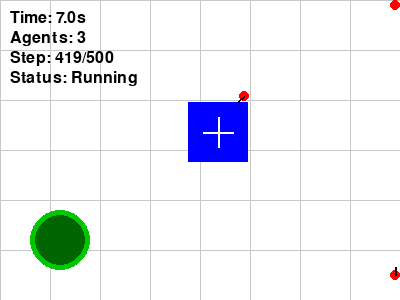


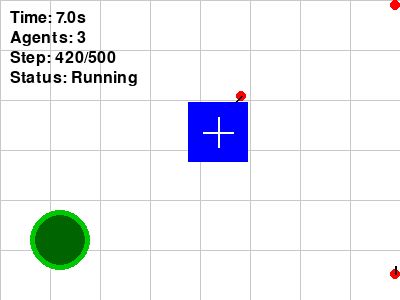


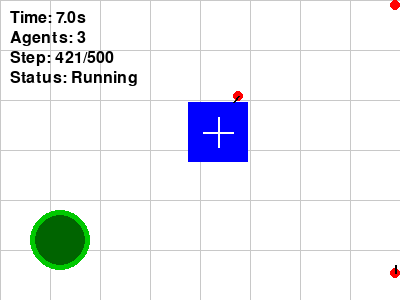


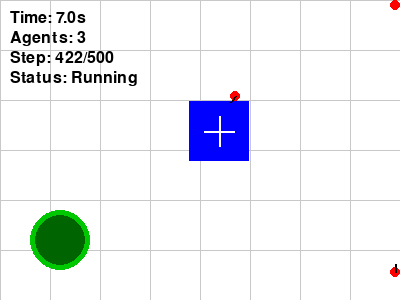


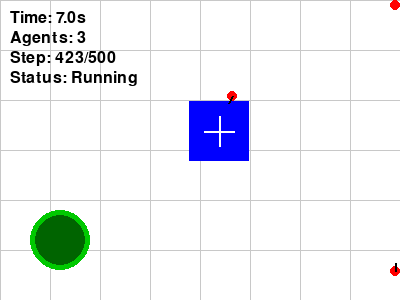


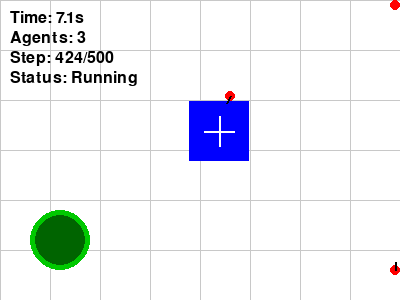


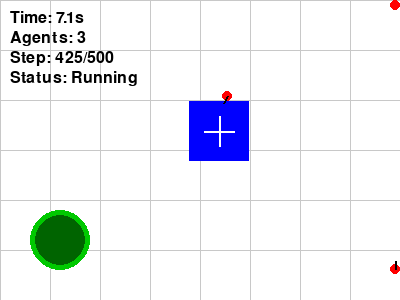


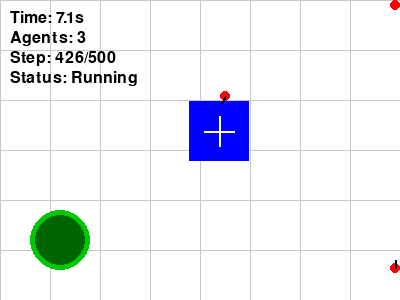


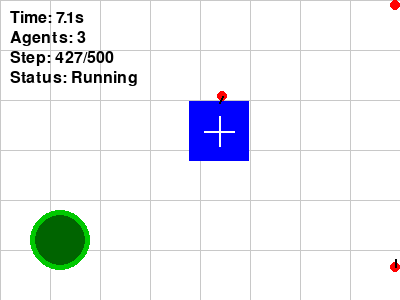


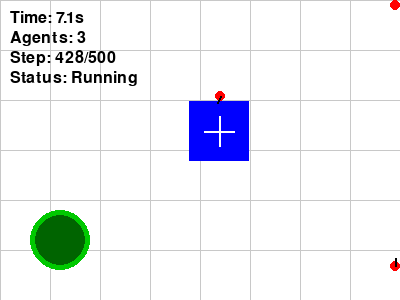


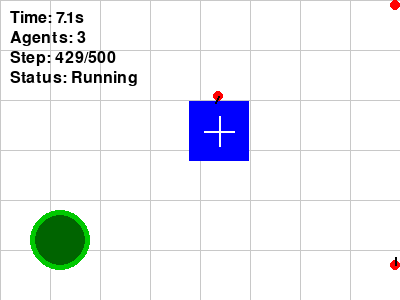


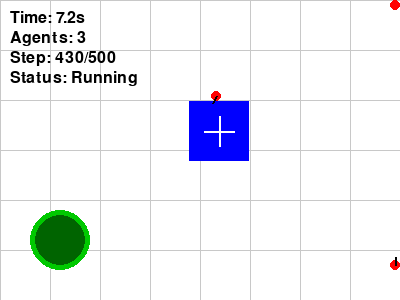


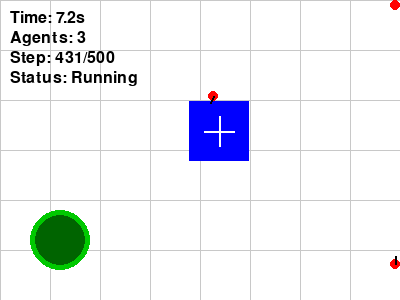


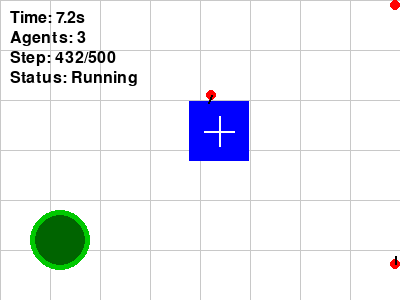


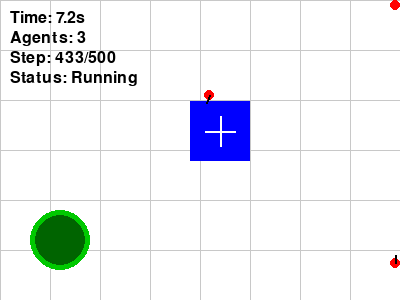


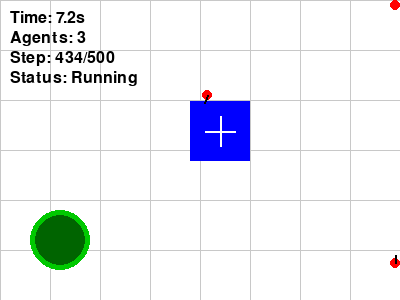


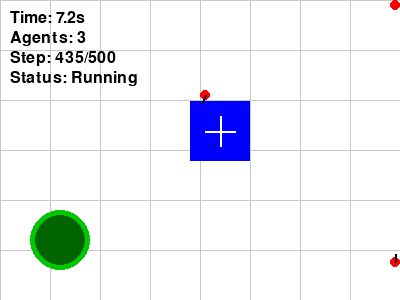


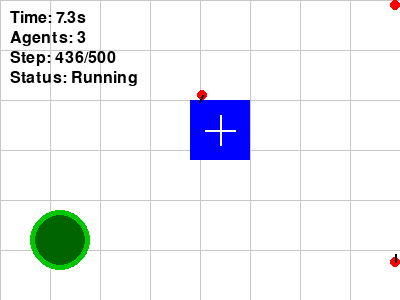


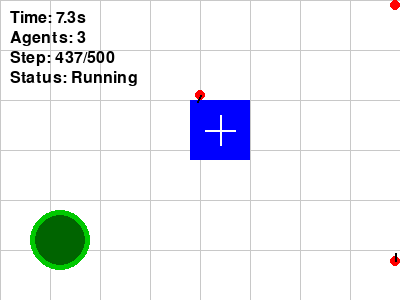


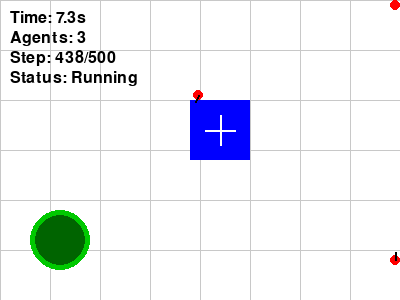


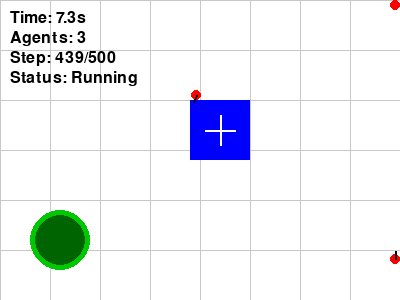


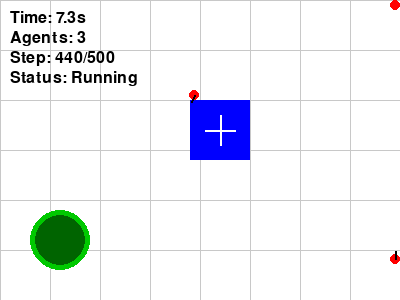


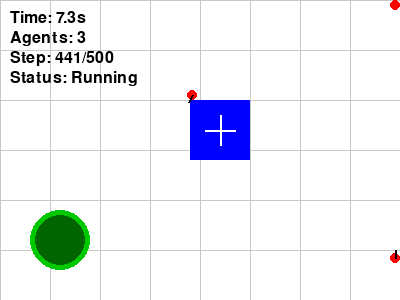


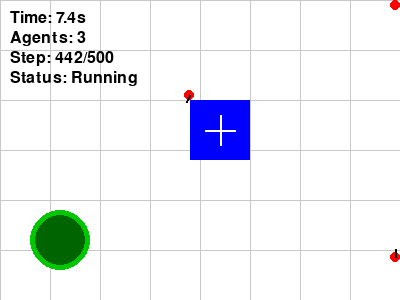


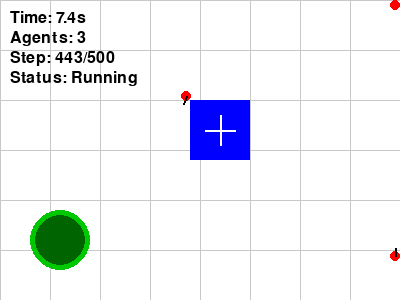


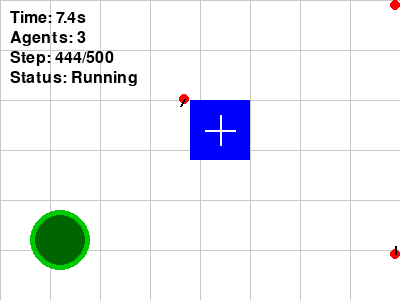


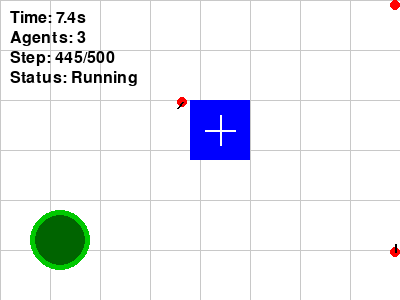


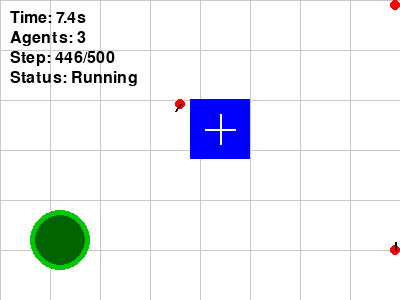


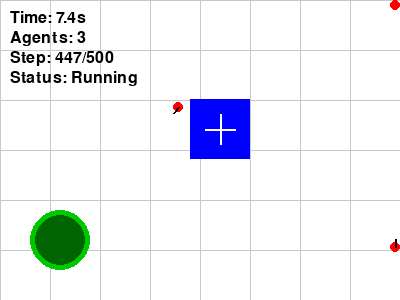


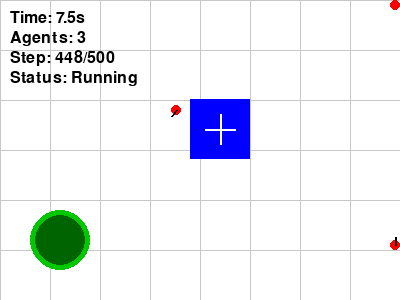


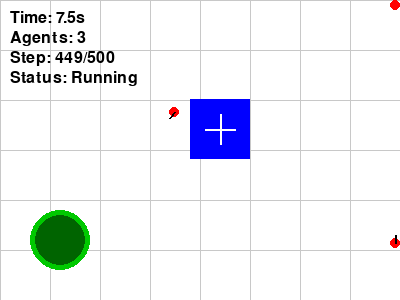


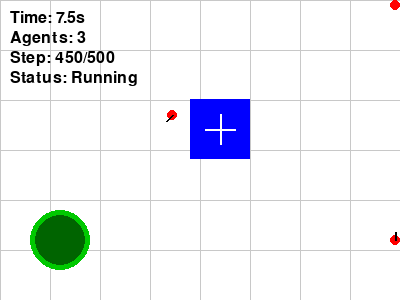


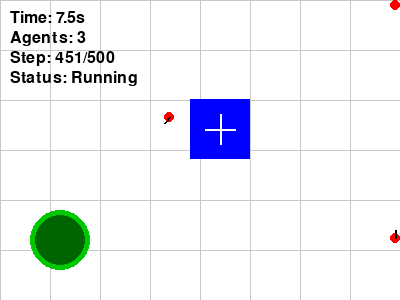


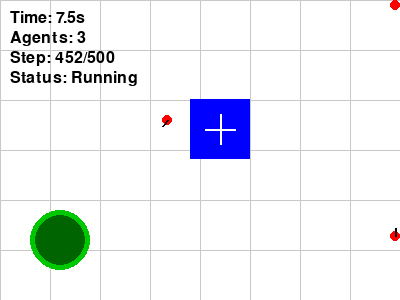


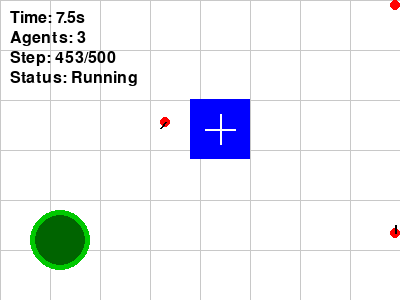


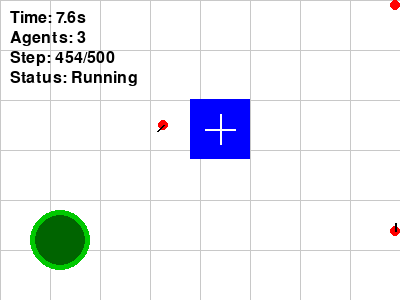


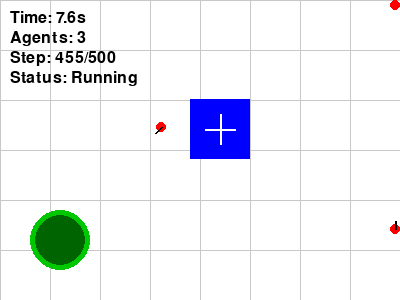


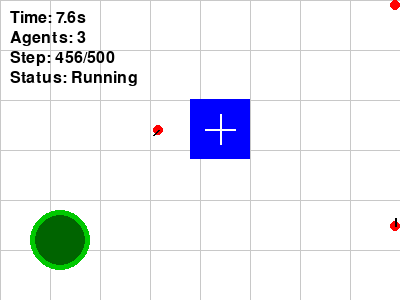


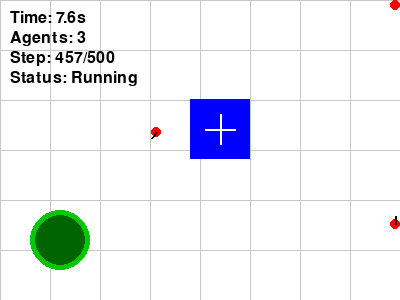


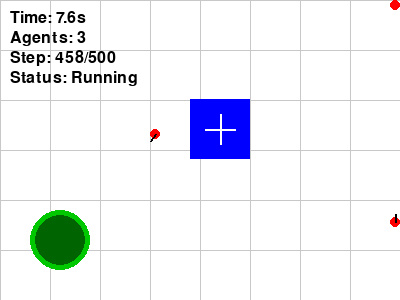


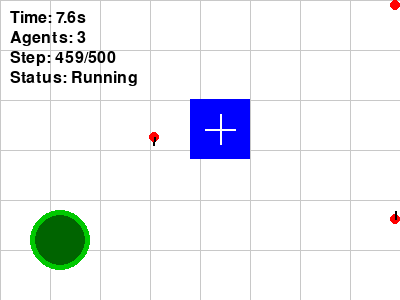


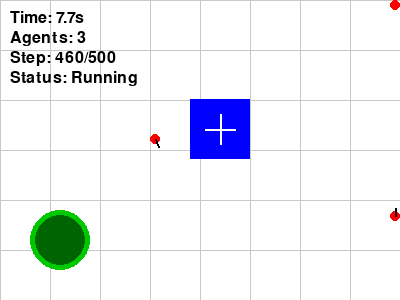


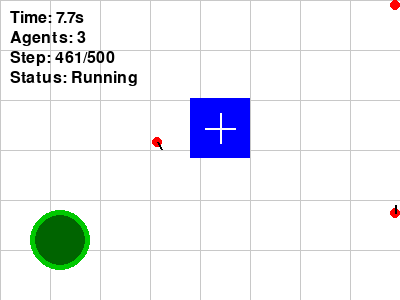


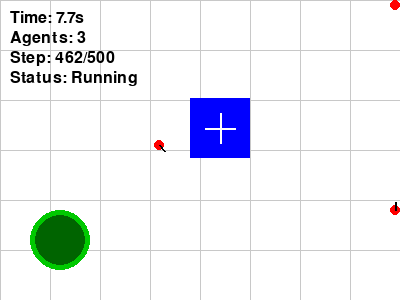


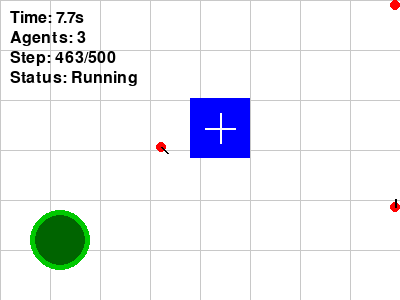


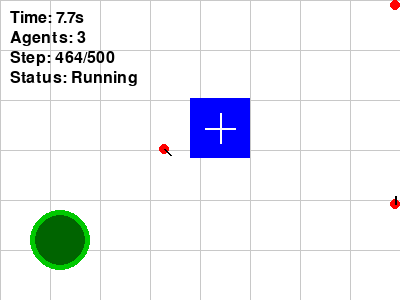


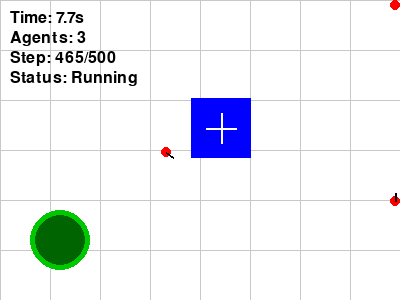


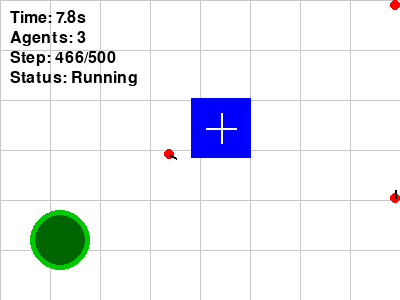


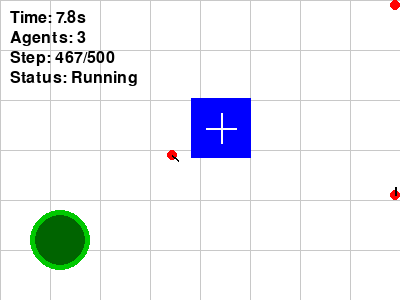


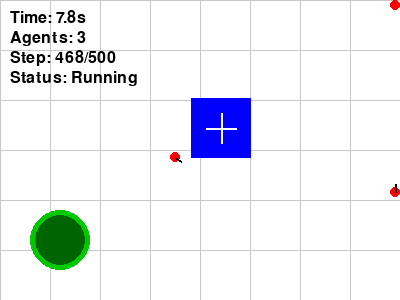


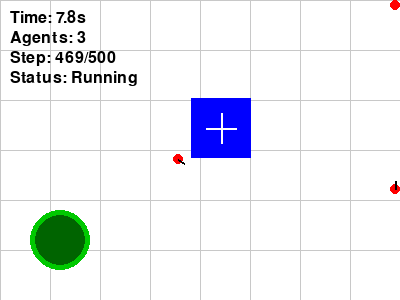


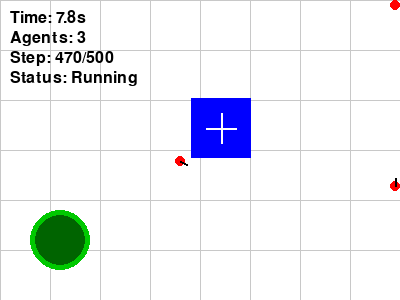


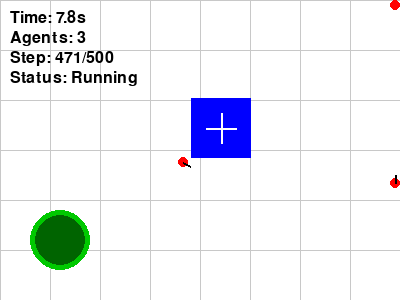


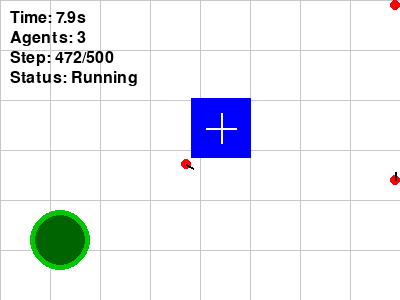


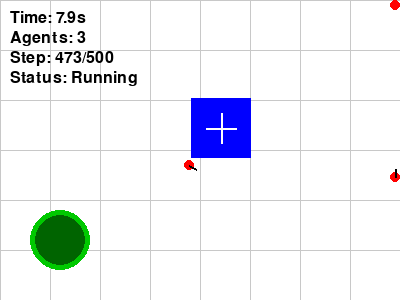


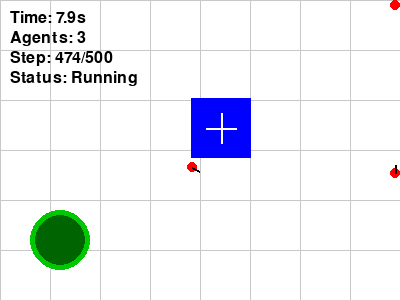


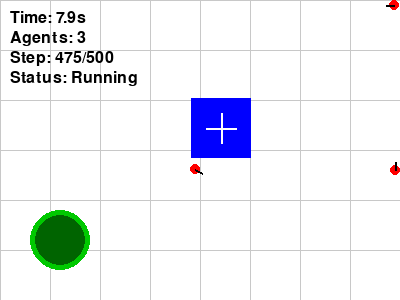


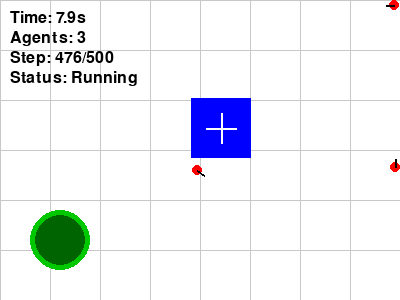


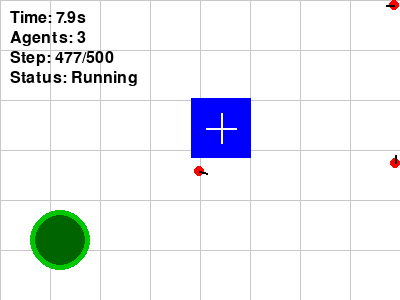


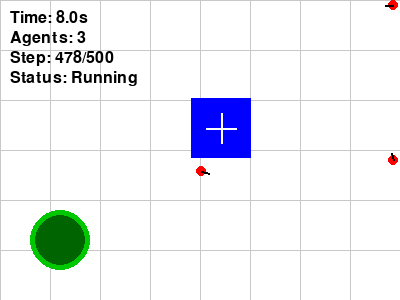


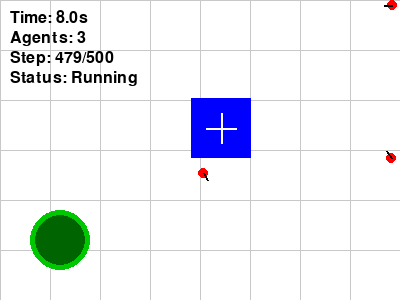


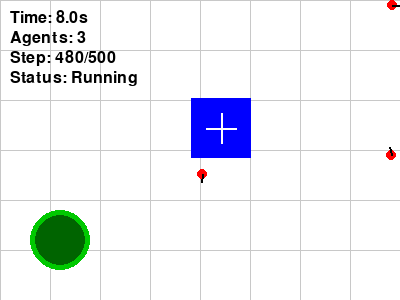


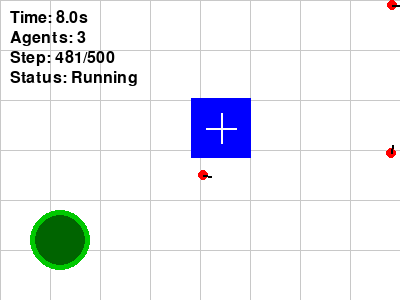


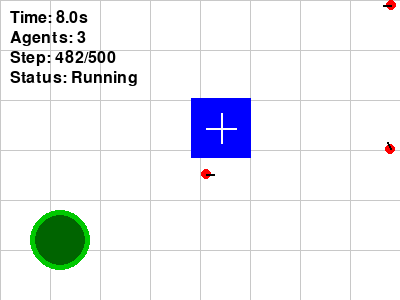


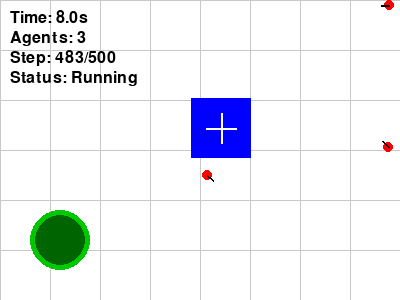


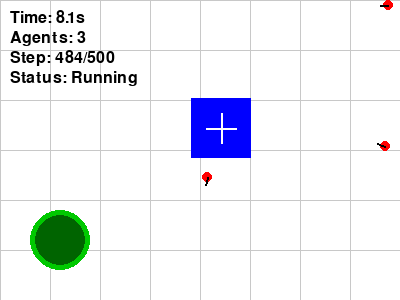


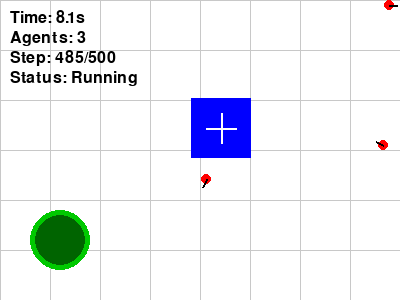


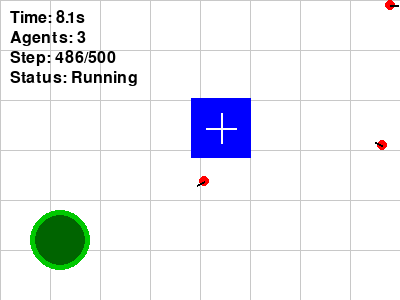


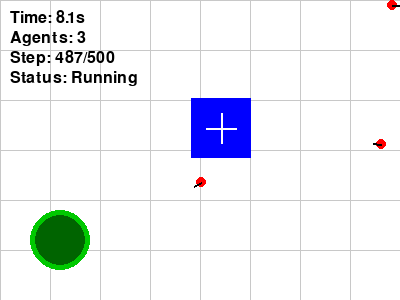


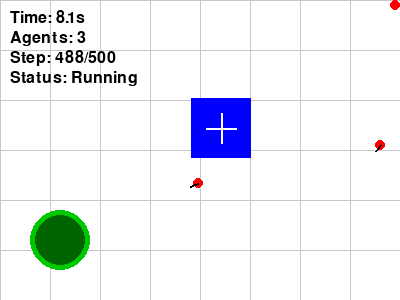


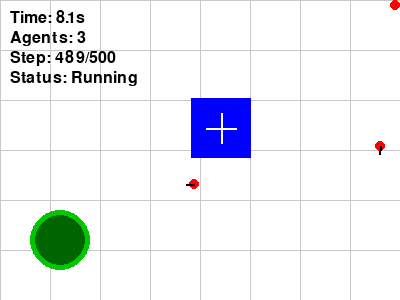


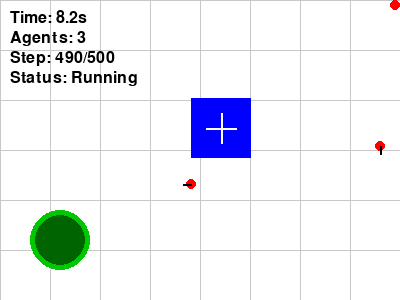


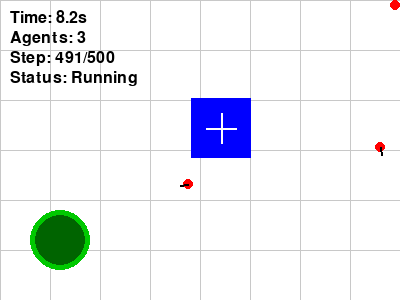


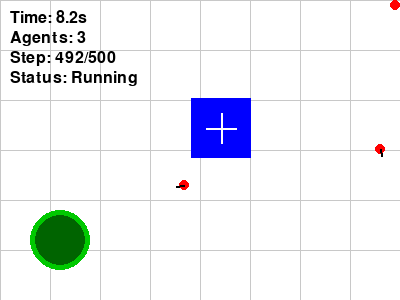


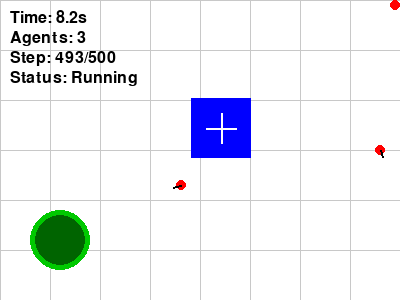


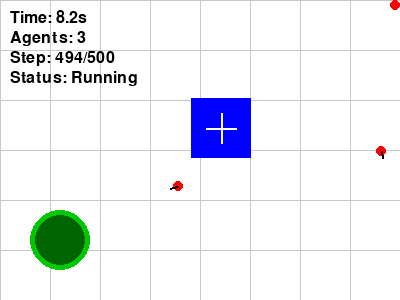


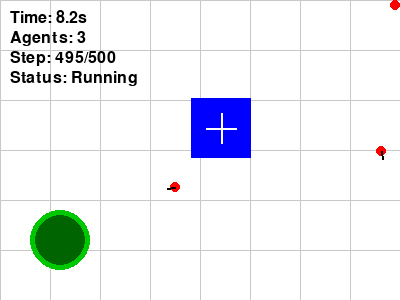


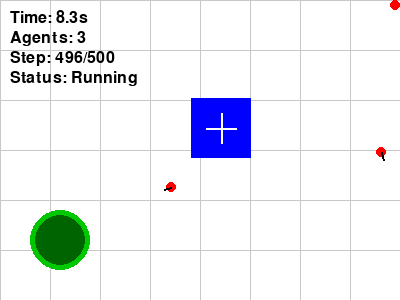


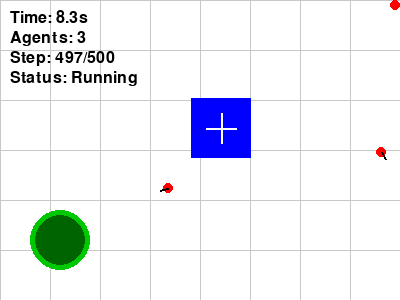


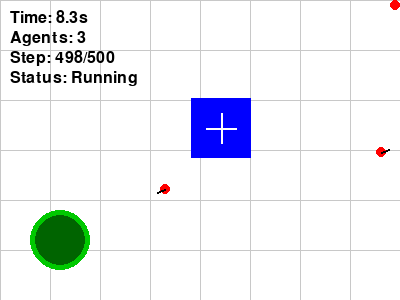


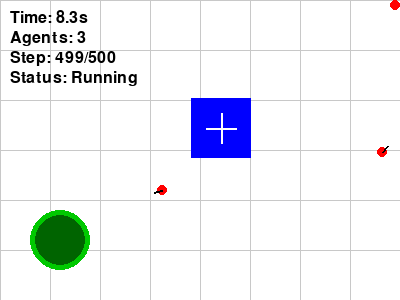


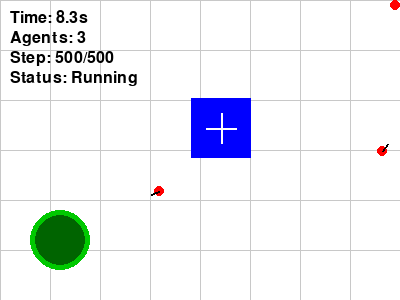

In [17]:
train_td3()

# Evaluate the trained model
evaluate()